# Assignment 4

Following initial evaluations of the Boston Housing Data our Data Science team deployed more powerful machine learning techniques aiming to improve the machine learning models when applied to the task of assessing the market value for residential real estate. Linear regression models served as the initial platform, but our team launched deeper into this use-case by employing non-parametric models and ensemble methods such as Decision Trees, Random Forests, Bagging, and Boosting. Using these techniques our team was able to improve predictive performance while garnering an enhanced understanding of the attributes influencing the real estate market circa 1970.

In order to best predict the median value of homes, our team recommends using the GradientBoostingRegressor() predictor for this application. This technique consistently ranked as a very high performer when compared to all other models. When evaluated with the entire data set using a cross-validation technique with 10 folds, this model slightly underperformed Random Forest models by way of average RMSE. However, GradientBoostingRegressor() predictors had lower RMSE standard deviations, required less estimators, and achieved higher R² scores compared to Random Forests. Evaluating model performance as a whole led our team to conclude that GradientBoostingRegressor() will lead to a very high performing prediction model for your firm. For instance our optimal model (n_estimators = 100, max_depth = None, max_features = 5, and learning_rate = 0.1) output an average RMSE of 0.177 when tested on the entire dataset with log median home values (lmv) as the label. This low level of standard error had a standard deviation of only 0.077 while capturing 95.6% of the dependent variable variation with the features used in the study. 

Our Data Science team leveraged the feature_importances_ method of these ensemble techniques in order to measure the relative importance of each feature for our top performing models. In doing so, our team learned that the features utilized can be placed into three tiers. The first tier of features has the highest relative importance and is made up of two features: lstat and rooms. These two features consistently accumulated 70-80% of the relative importance calculated by the feature_importances_ method utilized in the scikit-learn library. The second tier features consisted of crim, dis, nox, ptratio, age, tax, and indus. These features routinely had some degree of relative importance, but to varying amounts depending on the model and label. That leaves the third tier of features consisting of chas, zn, and rad. These three features essentially had zero impact on the modeling output. 

While our team recommends implementing GradientBoostingRegressor() predictors, Random Forests were the best performing in terms of lowest average RMSE when conducting cross-validation of the entire dataset and would be a good alternative. In order to better understand Random Forests performance the team evaluated the impact of the max_features hyperparameter by evaluating all possible max_features values: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, auto, sqrt, and log2. The number of estimators was held constant at 500. For the median home value (mv) label the max_features values of 5, 6, and 4 yielded the highest performing models, respectively. The lmv labels yielded a slightly different top three with max_features equal to 6, 5, and 7. Regardless of label, both models found that max_features set to 1, 2, and 12 yielded the worst results relative to the other hyperparameter alternatives. Also, both label types indicated log2 outperformed sqrt which outperformed auto (the default) hyperparameter values.

Compared to Random Forests and other ensemble techniques, we discovered that the linear models initially investigated were fledgling. These models were not flexible enough to adequately fit the data. The models generalized relatively well, but each fitted instantiation of a linear model was unable to suppress the RMSE to a level on par with higher performing models resulting in underfitted data. This is most likely due to the rigid linear confines of these parametric models.  The linear models were able to compete and even outperform non-parametric Decision Trees. The Decision Trees faltered by grossly overfitting the training data. This resulted in models that performed great on training data but generalized poorly compared to other model types. With linear models underfitting and Decision Trees overfitting training data, we can conclude that ensemble techniques such as Random Forests and Gradient Boosting are sufficient answers to our Goldilocks paradox. 

# Appendix

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import base packages into the namespace for this program & # modeling routines from Scikit Learn packages

%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt  # static plotting
import numpy as np               # arrays and math functions
import os
import pandas as pd              # data frame operations 
from pandas.plotting import scatter_matrix
import pylab as pl
import seaborn as sns            # pretty plotting, including heat map
import sklearn
import sklearn.linear_model
from math import sqrt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Decision Trees
# from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from IPython.display import Image
import re
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.cross_validation import ShuffleSplit

from decimal import Decimal

In [3]:
#Set Random Seed and Fit Intercept to True:
seed = 42
set_fit_intercept = True

In [4]:
#Read in the data:
boston = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 4/boston.csv")

In [5]:
#Look at the data:
boston.head()

neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2

In [6]:
#Look for data types and missing values:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


We can see that there are no missing values in this data set. We will drop Neighborhood soon. All other data types are numeric. Will want to add the log mv. Before dropping the neighborhood feature, it is still a good practice to understand a bit about the feature:

In [7]:
# check the pandas DataFrame object boston_input
print('\n BOSTON DataFrame (first and last five rows):\n')
print(boston.head())
print(boston.tail())


 BOSTON DataFrame (first and last five rows):

  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573 

In [8]:
#Look at the popular neighborhoods present in the Boston DataFrame:
boston['neighborhood'].value_counts()

Cambridge     30
Savin_Hill    23
Lynn          22
Roxbury       19
Newton        18
              ..
Nahant         1
Dover          1
Sherborn       1
Norwell        1
Duxbury        1
Name: neighborhood, Length: 93, dtype: int64

In [9]:
#Add the log median value of homes in thousands of 1970 dollars and drop neighborhood from the dataframe:
boston = pd.read_csv("/Users/mikesoukup/Desktop/NU MSDS/MSDS 422/Module 4/boston.csv")
boston['lmv'] = np.log(boston['mv'])
boston = boston.drop(columns = ['neighborhood'])
print('---------------------------------------')
print('General Info About Boston Data Set: \n')
boston.info()

---------------------------------------
General Info About Boston Data Set: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
 13  lmv      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


So here we can see that the last two columns of our data set will be our future labels. All other data will serve as our features. 506 entries, no missing values.

In [10]:
#Let's confirm no missing values within this dataframe:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
lmv        0
dtype: int64

All zeros confirm that there is no missing data / no null data within the dataset.

In [11]:
#Look at the descrptive statistics for this dataset:
print('-----------------------------------------------------')
print('Descriptive Statistics About Boston Data Set: \n')
boston.describe().transpose()

-----------------------------------------------------
Descriptive Statistics About Boston Data Set: 



count        mean         std         min         25%         50%  \
crim     506.0    3.613524    8.601545    0.006320    0.082045    0.256510   
zn       506.0   11.363636   23.322453    0.000000    0.000000    0.000000   
indus    506.0   11.136779    6.860353    0.460000    5.190000    9.690000   
chas     506.0    0.069170    0.253994    0.000000    0.000000    0.000000   
nox      506.0    0.554695    0.115878    0.385000    0.449000    0.538000   
rooms    506.0    6.284634    0.702617    3.561000    5.885500    6.208500   
age      506.0   68.574901   28.148861    2.900000   45.025000   77.500000   
dis      506.0    3.795043    2.105710    1.129600    2.100175    3.207450   
rad      506.0    9.549407    8.707259    1.000000    4.000000    5.000000   
tax      506.0  408.237154  168.537116  187.000000  279.000000  330.000000   
ptratio  506.0   18.455534    2.164946   12.600000   17.400000   19.050000   
lstat    506.0   12.653063    7.141062    1.730000    6.950000   11.360000   
mv       506.0   22.528854    9.182176    5.000000   17.025000   21.200000   
lmv      506.0    3.034558    0.408275    1.609438    2.834680    3.054001   

                75%         max  
crim       3.677082   88.976200  
zn        12.500000  100.000000  
indus     18.100000   27.740000  
chas       0.000000    1.000000  
nox        0.624000    0.871000  
rooms      6.623500    8.780000  
age       94.075000  100.000000  
dis        5.188425   12.126500  
rad       24.000000   24.000000  
tax      666.000000  711.000000  
ptratio   20.200000   22.000000  
lstat     16.955000   37.970000  
mv        25.000000   50.000000  
lmv        3.218876    3.912023

In [12]:
def quick_stats(X):
    min_val = np.amin(X)
    max_val = np.amax(X)
    mean_val = np.mean(X)
    med_val = np.median(X)
    std_val = np.std(X)
    
    print('------------------------------------------')
    print("Minimum price:                ${}".format(round(min_val,2))) 
    print("Maximum price:                ${}".format(round(max_val,2)))
    print("Mean price:                   ${}".format(round(mean_val,2)))
    print("Median price                  ${}".format(round(med_val,2)))
    print("Standard deviation of prices: ${}".format(round(std_val,3)))

In [13]:
print("Statistics for Boston Housing Median Value:")
quick_stats(boston['mv'])

Statistics for Boston Housing Median Value:
------------------------------------------
Minimum price:                $5.0
Maximum price:                $50.0
Mean price:                   $22.53
Median price                  $21.2
Standard deviation of prices: $9.173


In [14]:
print("Statistics for Boston Housing Log Median Value:")
quick_stats(boston['lmv'])

Statistics for Boston Housing Log Median Value:
------------------------------------------
Minimum price:                $1.61
Maximum price:                $3.91
Mean price:                   $3.03
Median price                  $3.05
Standard deviation of prices: $0.408


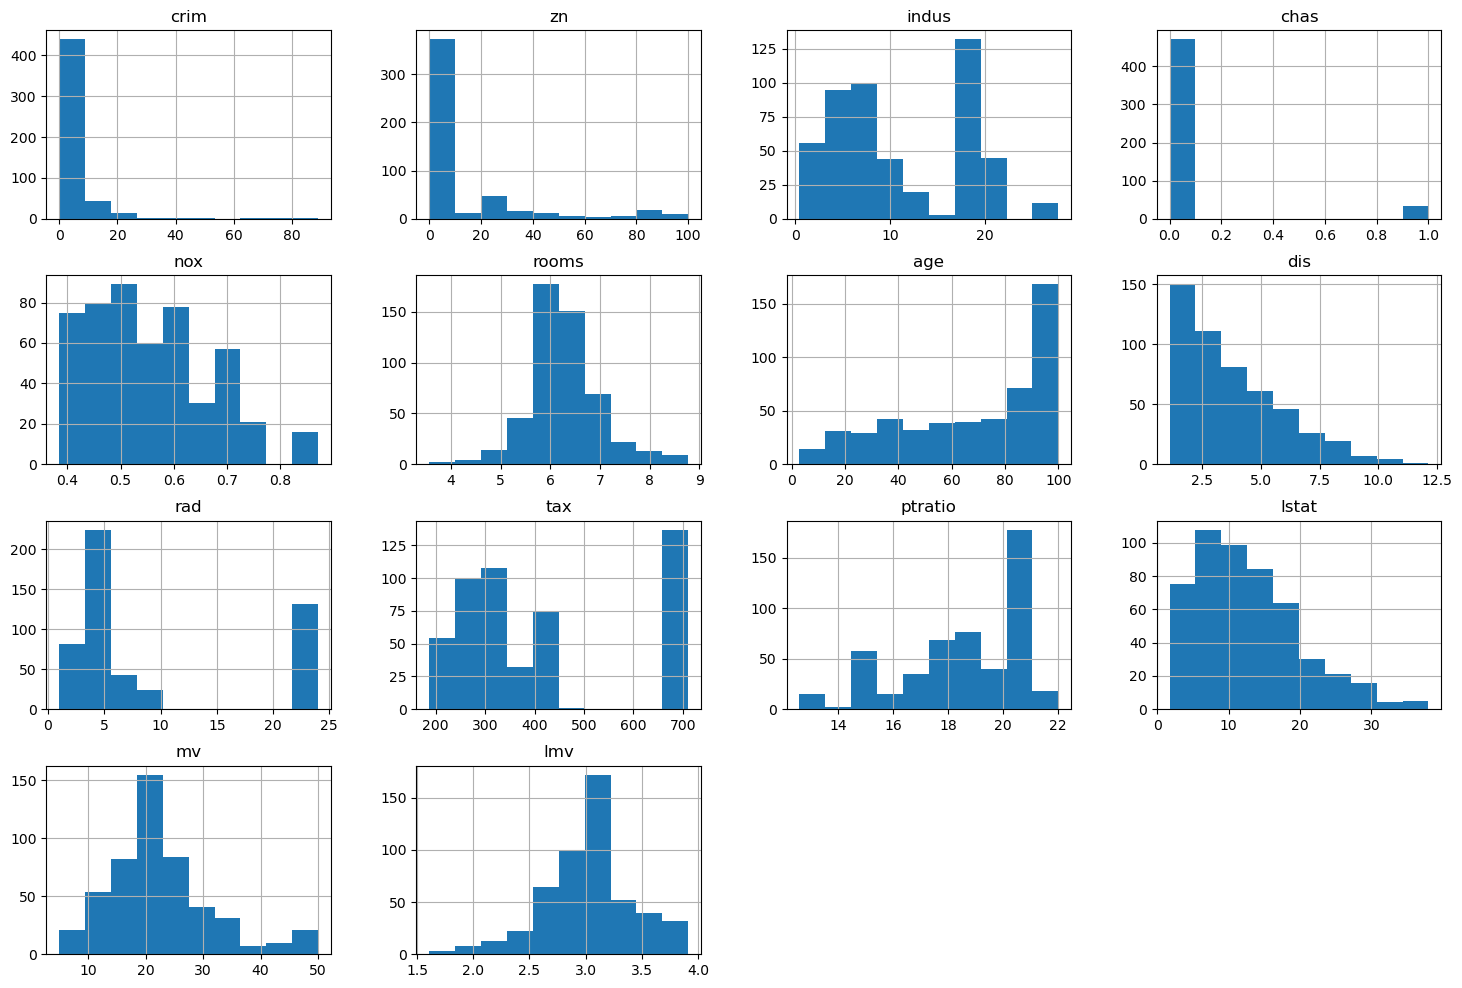

In [15]:
#Check distributions of non-categorical variables for boston housing by histogram:
boston.hist(figsize = (18,12))
plt.show()

Looking at the individual histograms shows a variety of distributions and scales of values. Distributions like crim, zn, chas, nox, dis, and lstat are clearly right skewed. Otheres like age and ptratio are left skewed. While rooms and mv seem relatively normal. There are also a variety of ranges with values scaling from 200 - 700 for tax values and 0.4 - 0.8 for nox. Based on this data, it appears clear that scaling will be important to achieve good results.

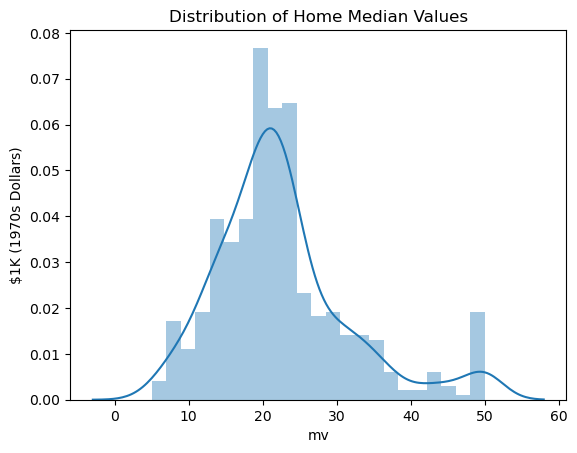

In [16]:
#Let's take a closer look at our label values:
sns.distplot(boston['mv'])
plt.title("Distribution of Home Median Values")
plt.ylabel("$1K (1970s Dollars)")
plt.show()

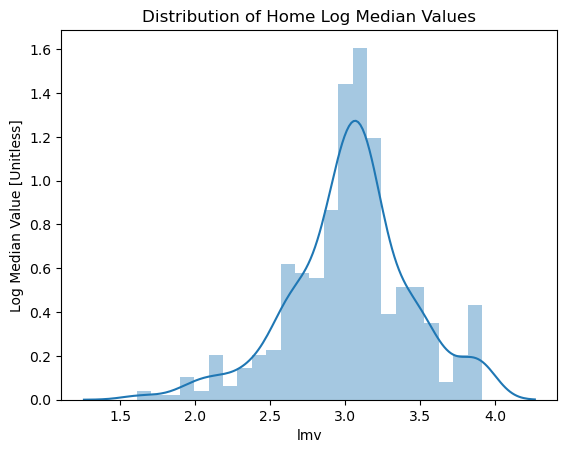

In [17]:
#Let's take a closer look at our label values:
sns.distplot(boston['lmv'])
plt.title("Distribution of Home Log Median Values")
plt.ylabel("Log Median Value [Unitless]")
plt.show()

In [18]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 640x480 with 0 Axes>

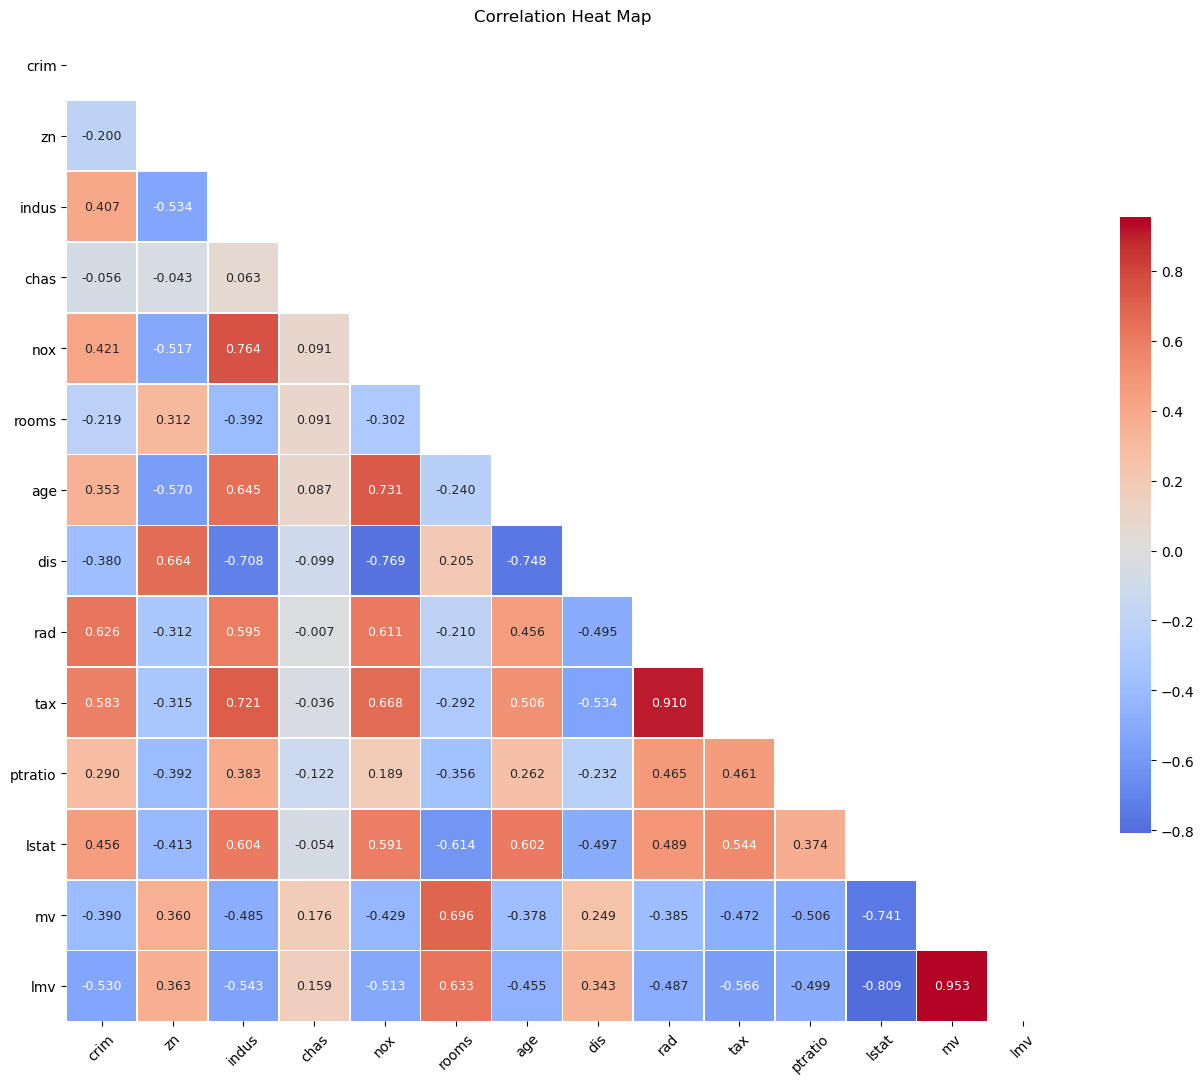

In [19]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

This plot shows the correlation coefficients comparing each feature within the boston data set. The key takeaways here are that lstat, rooms, and ptratio appear to be the features with the strongest correlation to mv. It is interesting to note that the strongest correlators with lmv are lstat, rooms, and tax. So feature engineering is leading to a slightly different output in terms of correlation. Also it is interesting to note that the correlation coefficients of the features with lmv are stronger (higher absolute value) compared to that of mv. So clearly, it seems that feature engineering is likely going to lead to improved predictive performance in this case.

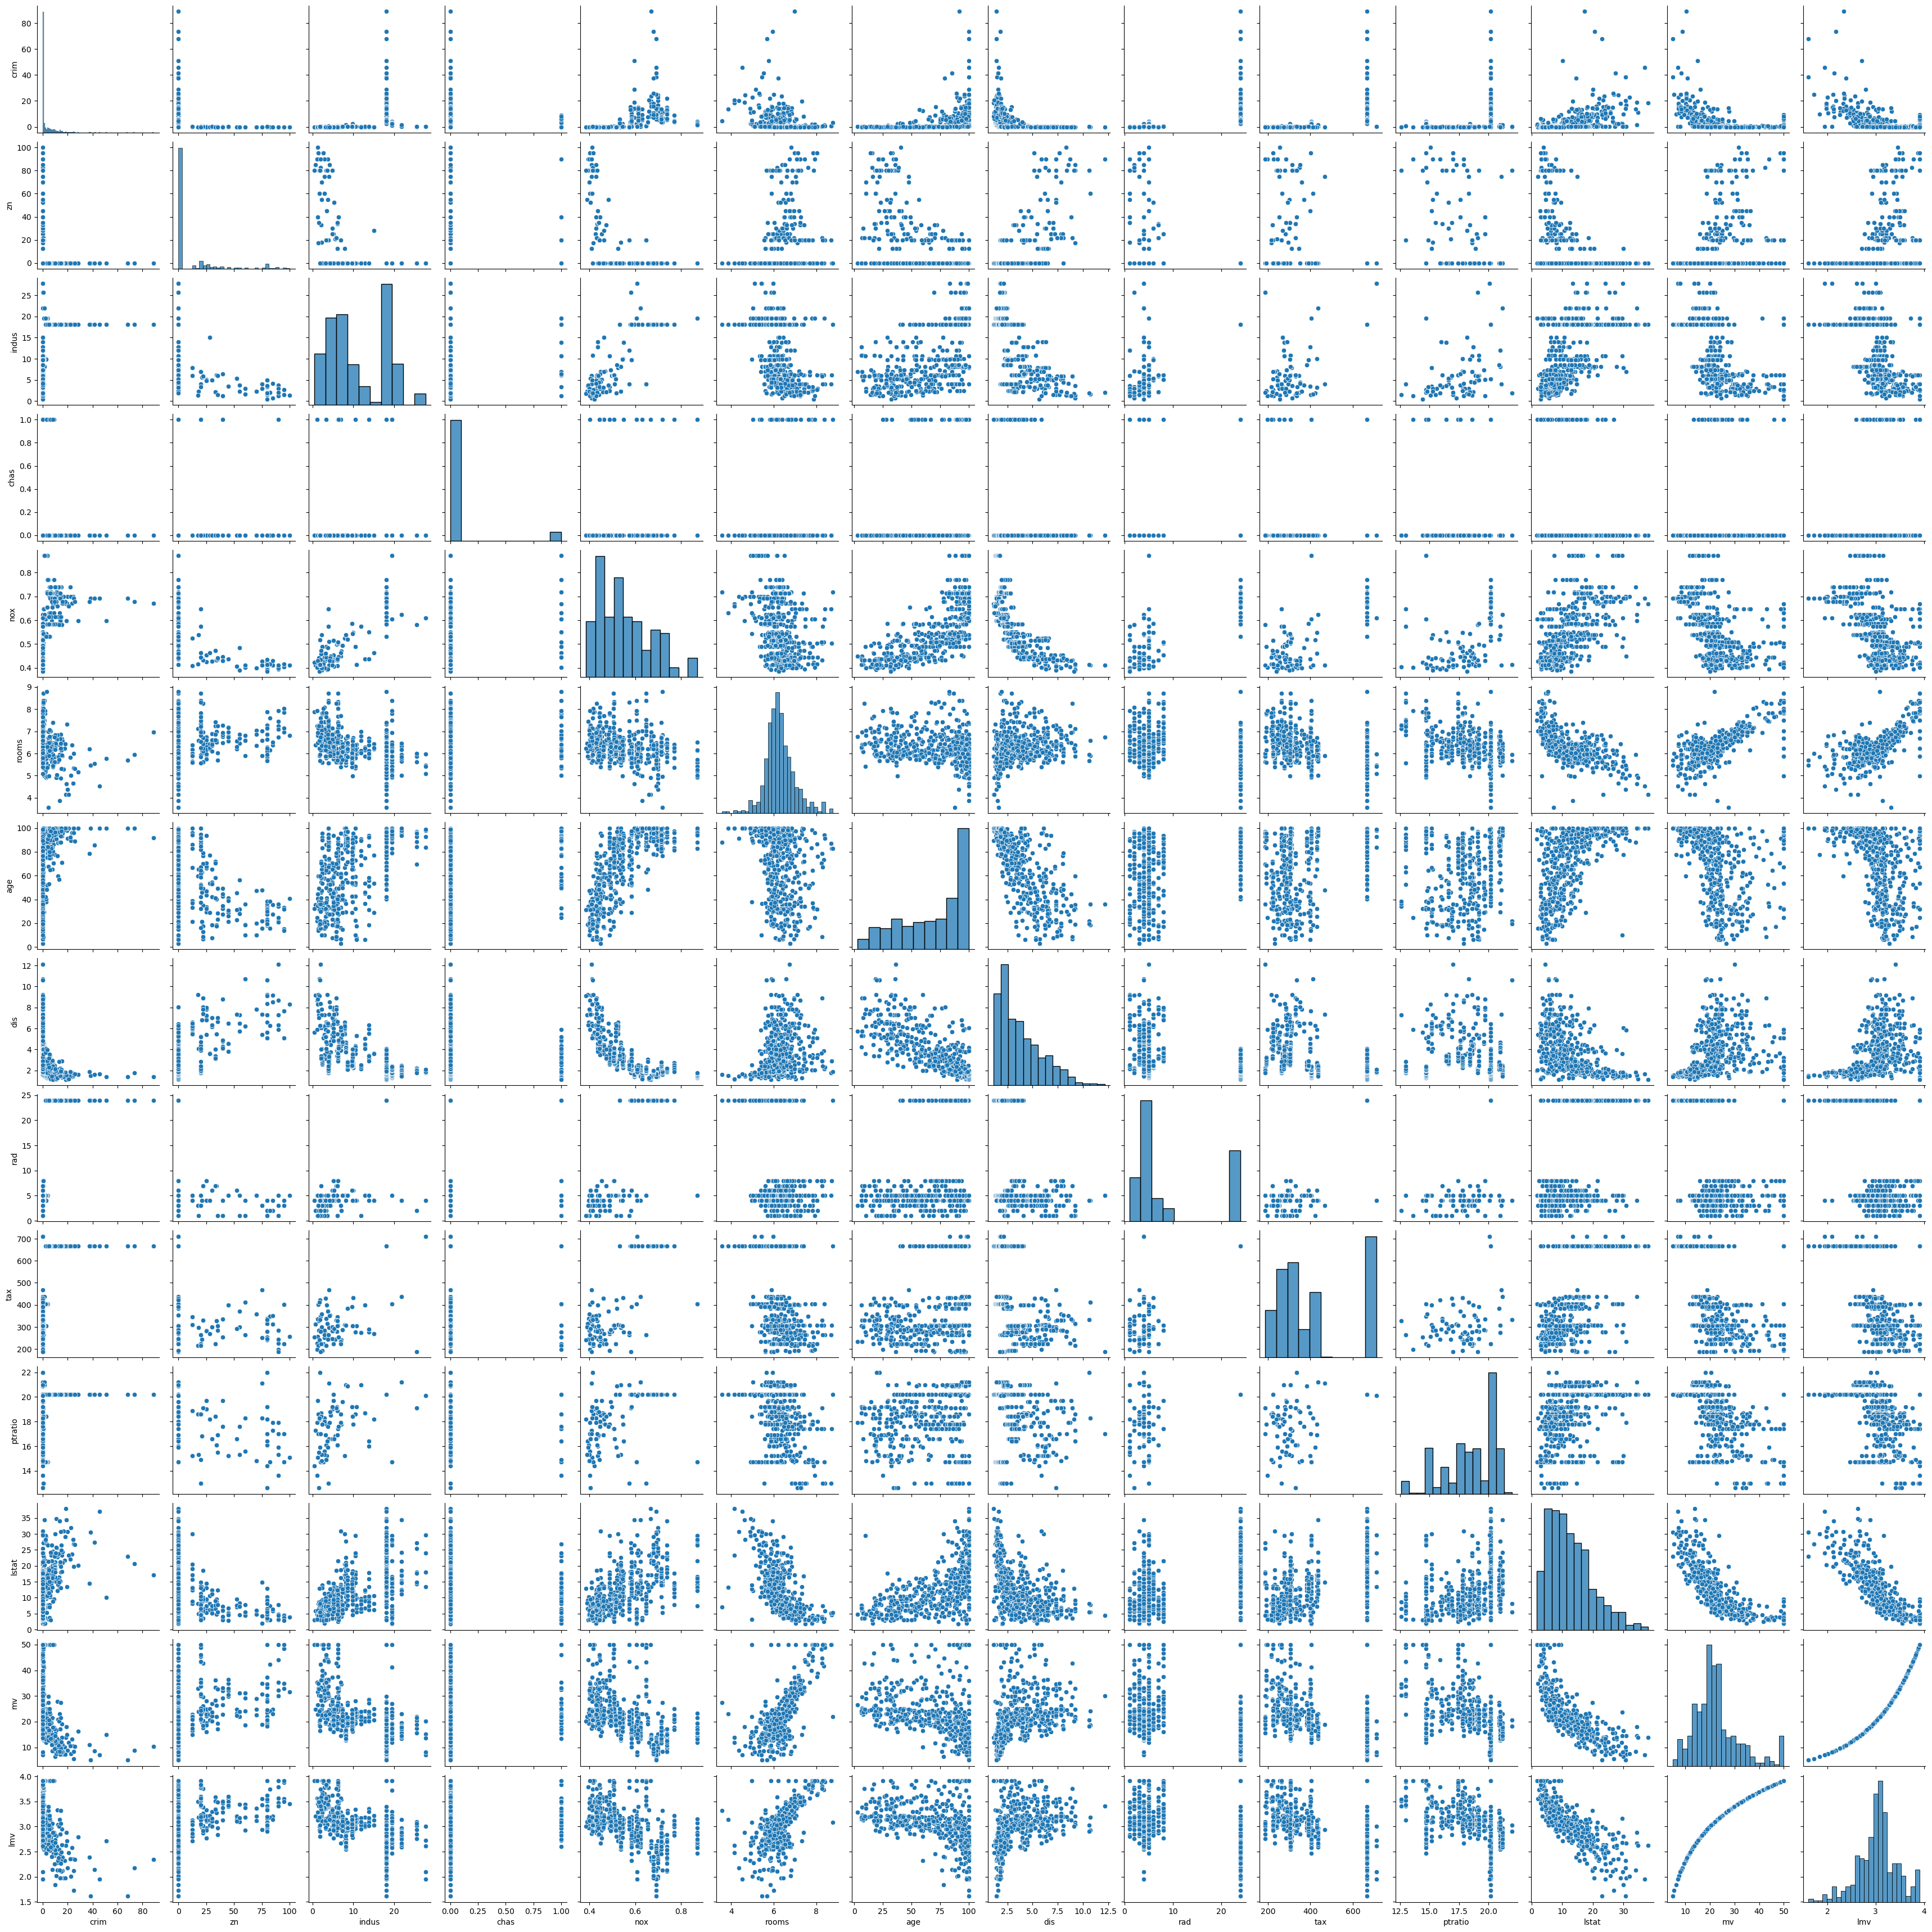

In [20]:
#Now let's look at a Seaborn Pairplot to begin understanding visually the bivariate relations:
sns.pairplot(boston)
plt.show()

Looking at the pairplots it appears that there are varying degrees of correlation which was confirms our findings from our correlation heat map. What we also can take away from this pairplot is how may of the correlations do not appear to be linear. This is important because we will want to understand the impact of linear regression classifiers like LinearRegression(), Lasso(), ElasticNet(), Ridge(), etc. They may fall short compared to non-linear models like RandomForests because of how many of these relationships appear to be non-linear.

In [21]:
#Initialize the X and Y variables:
import math
X = boston[['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
feature_cols = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
mv = boston['mv']
lmv = boston['lmv']

X_train, X_test, mv_train, mv_test = model_selection.train_test_split(X,mv,test_size = 0.2, random_state = seed)

In [22]:
XX_train, XX_test, lmv_train, lmv_test = model_selection.train_test_split(X,lmv,test_size = 0.2, random_state = seed)

In [23]:
(X_train == XX_train).all()

crim       True
zn         True
indus      True
chas       True
nox        True
rooms      True
age        True
dis        True
rad        True
tax        True
ptratio    True
lstat      True
dtype: bool

This is just a quick check to ensure that copying code for X_train and X_test won't lead to any errors. Confirms as long as random_state is held constant these values will be equivalent.


In [24]:
X_train, X_test, lmv_train, lmv_test = model_selection.train_test_split(X,lmv,test_size = 0.2, random_state = seed)

In [25]:
#Normalizing the dataset using MinMaxScaler Transformations:
X_train_minmax = MinMaxScaler().fit_transform(X_train)
X_test_minmax = MinMaxScaler().fit_transform(X_test)
X_minmax = MinMaxScaler().fit_transform(X)

In [26]:
#Look at the impact of MinMaxScaler on the features:
print("Training Data Scaled with Mix Max Scaler:","\n")
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
pd.DataFrame(data = X_train_minmax, columns = feature_cols).describe()

Training Data Scaled with Mix Max Scaler: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



crim          zn       indus        chas         nox       rooms  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     0.040465    0.115693    0.379446    0.071782    0.352848    0.498859   
std      0.099757    0.231525    0.255356    0.258447    0.242190    0.144285   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000814    0.000000    0.162593    0.000000    0.137860    0.412345   
50%      0.002836    0.000000    0.289630    0.000000    0.314815    0.477324   
75%      0.035900    0.200000    0.642963    0.000000    0.506173    0.564114   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              age         dis         rad         tax     ptratio       lstat  
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000  
mean     0.676173    0.243577    0.363323    0.414184    0.608332    0.296009  
std      0.288310    0.193802    0.373466    0.317123    0.237096    0.196203  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.439238    0.087140    0.130435    0.175573    0.446809    0.139142  
50%      0.770340    0.186066    0.173913    0.272901    0.648936    0.253725  
75%      0.934604    0.388400    0.478261    0.914122    0.808511    0.404042  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [27]:
#Look at the impact of MinMaxScaler on the features:
print("Test Data Scaled with Mix Max Scaler:","\n")
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
pd.DataFrame(data = X_test_minmax, columns = feature_cols).describe()

Test Data Scaled with Mix Max Scaler: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



crim          zn       indus        chas         nox       rooms  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     0.079245    0.111042    0.413407    0.058824    0.324862    0.581228   
std      0.163088    0.253508    0.246429    0.236456    0.226727    0.148407   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001772    0.000000    0.206837    0.000000    0.117432    0.516264   
50%      0.004451    0.000000    0.371334    0.000000    0.292276    0.583389   
75%      0.098736    0.000000    0.646628    0.000000    0.479123    0.652414   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              age         dis         rad         tax     ptratio       lstat  
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000  
mean     0.665757    0.269762    0.404945    0.452949    0.666558    0.309332  
std      0.308005    0.210744    0.398343    0.339316    0.200064    0.212452  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.400853    0.114750    0.130435    0.179254    0.600000    0.140982  
50%      0.730277    0.228933    0.173913    0.300191    0.688889    0.277273  
75%      0.949094    0.376863    1.000000    0.913958    0.800000    0.443915  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [28]:
#Look at the impact of MinMaxScaler on the features:
print("All Data Scaled with Mix Max Scaler:","\n")
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
pd.DataFrame(data = X_minmax, columns = feature_cols).describe()

All Data Scaled with Mix Max Scaler: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.040544    0.113636    0.391378    0.069170    0.349167    0.521869   
std      0.096679    0.233225    0.251479    0.253994    0.238431    0.134627   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000851    0.000000    0.173387    0.000000    0.131687    0.445392   
50%      0.002812    0.000000    0.338343    0.000000    0.314815    0.507281   
75%      0.041258    0.125000    0.646628    0.000000    0.491770    0.586798   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              age         dis         rad         tax     ptratio       lstat  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     0.676364    0.242381    0.371713    0.422208    0.622929    0.301409  
std      0.289896    0.191482    0.378576    0.321636    0.230313    0.197049  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.433831    0.088259    0.130435    0.175573    0.510638    0.144040  
50%      0.768280    0.188949    0.173913    0.272901    0.686170    0.265728  
75%      0.938980    0.369088    1.000000    0.914122    0.808511    0.420116  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

From the output of the MinMaxScaler above, the mean represents the interest level.
It should be noted that most of the times, features in datasets vary highly in magnitudes, units and range. Given that most of the machine learning algorithms use the Eucledian distance between two datapoints in their computation, the varying magnitudes, units and range of the features pose a problem where by the ML algorithms would take into account only the magnitudes ignoring the units. As a result, features with high magnitudes would weigh alot more in the Eucladian distance calculations than those with low magnitudes.
As a mitigation step, all the features were normalized to the same magnitude level using the MinMaxScaler in SciKit package.

It is also advantageous here not to scale the labels so that way RMSE will be in the units of mv or lmv. This will make our error predictions easier to interpret.

In [29]:
#Now consider using StandardScaler:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.fit_transform(X_test)
X_ss = scaler.fit_transform(X)

In [30]:
#Look at the impact of StandardScaler on the features:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
print('Training Data:')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
print('Scaler Means: \n')
print(scaler.mean_,'\n')
print('Scales: \n')
print(scaler.scale_,'\n')
print("Training Data Scaled with StandardScaler:","\n")
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
pd.DataFrame(data = X_train_ss, columns = feature_cols).describe().transpose()

Training Data:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Scaler Means: 

[3.609e+00 1.157e+01 1.099e+01 7.178e-02 5.565e-01 6.316e+00 6.856e+01
 3.808e+00 9.356e+00 4.040e+02 1.832e+01 1.246e+01] 

Scales: 

[8.864e+00 2.312e+01 6.886e+00 2.581e-01 1.176e-01 7.086e-01 2.796e+01
 2.129e+00 8.579e+00 1.660e+02 2.226e+00 7.102e+00] 

Training Data Scaled with StandardScaler: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



count          mean      std       min       25%       50%       75%  \
crim     404.0 -4.699211e-17  1.00124 -0.406141 -0.397976 -0.377675 -0.045821   
zn       404.0  8.354153e-17  1.00124 -0.500320 -0.500320 -0.500320  0.364589   
indus    404.0 -8.656442e-18  1.00124 -1.487791 -0.850273 -0.352167  1.033237   
chas     404.0 -6.732788e-17  1.00124 -0.278089 -0.278089 -0.278089 -0.278089   
nox      404.0 -5.706381e-16  1.00124 -1.458711 -0.888783 -0.157233  0.633861   
rooms    404.0 -2.092660e-16  1.00124 -3.461733 -0.600349 -0.149443  0.452824   
age      404.0 -4.858600e-16  1.00124 -2.348206 -0.822826  0.327020  0.897473   
dis      404.0  3.929750e-17  1.00124 -1.258391 -0.808198 -0.297120  0.748198   
rad      404.0 -9.041173e-17  1.00124 -0.974048 -0.624360 -0.507797  0.308141   
tax      404.0 -1.534457e-16  1.00124 -1.307684 -0.753356 -0.446066  1.578434   
ptratio  404.0  8.249727e-16  1.00124 -2.568944 -0.682101  0.171470  0.845343   
lstat    404.0 -1.648846e-16  1.00124 -1.510559 -0.800506 -0.215776  0.551307   

              max  
crim     9.630689  
zn       3.824227  
indus    2.433163  
chas     3.595975  
nox      2.675394  
rooms    3.477564  
age      1.124581  
dis      3.907900  
rad      1.706891  
tax      1.849573  
ptratio  1.653990  
lstat    3.592534

In [31]:
#Look at the impact of StandardScaler on the features:
scaler = StandardScaler()
X_test_ss = scaler.fit_transform(X_test)
print('Test Data:')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
print('Scaler Means: \n')
print(scaler.mean_,'\n')
print('Scales: \n')
print(scaler.scale_,'\n')
print("Test Data Scaled with StandardScaler:","\n")
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
pd.DataFrame(data = X_test_ss, columns = feature_cols).describe().transpose()

Test Data:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Scaler Means: 

[3.631e+00 1.055e+01 1.174e+01 5.882e-02 5.476e-01 6.161e+00 6.865e+01
 3.743e+00 1.031e+01 4.249e+02 1.900e+01 1.343e+01] 

Scales: 

[7.423e+00 2.396e+01 6.690e+00 2.353e-01 1.081e-01 6.606e-01 2.875e+01
 2.001e+00 9.117e+00 1.766e+02 1.792e+00 7.209e+00] 

Test Data Scaled with StandardScaler: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



count          mean       std       min       25%       50%  \
crim     102.0  7.510332e-17  1.004938 -0.488300 -0.477382 -0.460876   
zn       102.0 -9.360704e-17  1.004938 -0.440186 -0.440186 -0.440186   
indus    102.0  5.567442e-16  1.004938 -1.685877 -0.842396 -0.171573   
chas     102.0 -2.122485e-17  1.004938 -0.250000 -0.250000 -0.250000   
nox      102.0 -5.877651e-17  1.004938 -1.439907 -0.919405 -0.144434   
rooms    102.0 -1.755404e-15  1.004938 -3.935782 -0.439902  0.014634   
age      102.0 -2.525213e-16  1.004938 -2.172189 -0.864313  0.210511   
dis      102.0  1.937448e-16  1.004938 -1.286366 -0.739179 -0.194690   
rad      102.0 -1.121108e-16  1.004938 -1.021593 -0.692532 -0.582846   
tax      102.0  1.450365e-16  1.004938 -1.341478 -0.810588 -0.452415   
ptratio  102.0 -7.118489e-16  1.004938 -3.348173 -0.334325  0.112171   
lstat    102.0  3.058556e-16  1.004938 -1.463204 -0.796329 -0.151649   

              75%       max  
crim     0.120104  5.673641  
zn      -0.440186  3.523945  
indus    0.951075  2.392130  
chas    -0.250000  4.000000  
nox      0.683743  2.992461  
rooms    0.482038  2.835711  
age      0.924452  1.090545  
dis      0.510716  3.482165  
rad      1.501204  1.501204  
tax      1.365351  1.620178  
ptratio  0.670291  1.674907  
lstat    0.636602  3.266994

In [32]:
#Look at the impact of StandardScaler on the features:
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)
print('All Data:')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
print('Scaler Means: \n')
print(scaler.mean_,'\n')
print('Scales: \n')
print(scaler.scale_,'\n')
print("All Data Scaled with StandardScaler:","\n")
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++','\n')
pd.DataFrame(data = X_ss, columns = feature_cols).describe().transpose()

All Data:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

Scaler Means: 

[3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00 6.857e+01
 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01] 

Scales: 

[8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01 2.812e+01
 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00] 

All Data Scaled with StandardScaler: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 



count          mean      std       min       25%       50%       75%  \
crim     506.0 -8.688702e-17  1.00099 -0.419782 -0.410970 -0.390667  0.007397   
zn       506.0  3.306534e-16  1.00099 -0.487722 -0.487722 -0.487722  0.048772   
indus    506.0  2.804081e-16  1.00099 -1.557842 -0.867691 -0.211099  1.015999   
chas     506.0 -3.100287e-16  1.00099 -0.272599 -0.272599 -0.272599 -0.272599   
nox      506.0 -8.071058e-16  1.00099 -1.465882 -0.913029 -0.144217  0.598679   
rooms    506.0 -5.978968e-17  1.00099 -3.880249 -0.568630 -0.108466  0.482768   
age      506.0 -2.650493e-16  1.00099 -2.335437 -0.837448  0.317382  0.906798   
dis      506.0  8.293761e-17  1.00099 -1.267069 -0.805688 -0.279323  0.662371   
rad      506.0  1.514379e-15  1.00099 -0.982843 -0.637962 -0.523001  1.661245   
tax      506.0 -9.934960e-16  1.00099 -1.313990 -0.767576 -0.464673  1.530926   
ptratio  506.0  4.493551e-16  1.00099 -2.707379 -0.488039  0.274859  0.806576   
lstat    506.0 -1.595123e-16  1.00099 -1.531127 -0.799420 -0.181254  0.603019   

              max  
crim     9.933931  
zn       3.804234  
indus    2.422565  
chas     3.668398  
nox      2.732346  
rooms    3.555044  
age      1.117494  
dis      3.960518  
rad      1.661245  
tax      1.798194  
ptratio  1.638828  
lstat    3.548771

In [33]:
#Next, since I will want to evaluate multiple models via the same metrics
#I will write a function to evaluate all models the same way:
def ml_model_eval(Estimator, X_train, X_test, X, y_train, y_test, y):
    
    reg = Estimator
    
    #Fit Estimator to training data:
    reg.fit(X_train, y_train)
    
    #Compute RMSE on training / test / entire dataset:
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    y_pred_all = reg.predict(X)
    
    #Construct a vector of errors for train and test data sets:
    err_train = abs(y_pred_train - y_train)
    err_test = abs(y_pred_test - y_test)
    err_all = abs(y_pred_all - y)
    
    #Calculate residuals:
    res_train = y_pred_train - y_train
    res_test = y_pred_test - y_test
    res_all = y_pred_all - y
    
    #Compute RMSE for training / test / entire dataset:
    rmse_train = sqrt(abs(mean_squared_error(y_train, y_pred_train)))
    rmse_test = sqrt(abs(mean_squared_error(y_test, y_pred_test)))
    rmse_all = sqrt(abs(mean_squared_error(y, y_pred_all)))
    
    #Set up Cross-Validation
    reg_cv = Estimator
    scores_train = cross_val_score(reg_cv, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
    reg_cv = Estimator
    scores_test = cross_val_score(reg_cv, X_test, y_test, scoring = "neg_mean_squared_error", cv = 10)
    reg_cv = Estimator
    scores_all = cross_val_score(reg_cv, X, y, scoring = "neg_mean_squared_error", cv = 10)
    
    #Compute Cross-Validation Mean RMSE and Standard Deviation:
    rmse_cv_train = np.sqrt(-scores_train).mean()
    rmse_cv_test = np.sqrt(-scores_test).mean()
    rmse_cv_all = np.sqrt(-scores_all).mean()
    
    rmse_cv_train_std = np.sqrt(-scores_train).std()
    rmse_cv_test_std = np.sqrt(-scores_test).std()
    rmse_cv_all_std = np.sqrt(-scores_all).std()
    
    #Compute Accuracy:
    acc_train = reg.score(X_train, y_train)
    acc_test = reg.score(X_test, y_test)
    acc_all = reg.score(X, y)
    
    #Print Results:
    print('\nRMSE Summary:')
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    print("RMSE - train:                        %.4f" % rmse_train)
    print("RMSE - test:                         %.4f" % rmse_test)
    #print("RMSE - all :                         %.4f" % rmse_all)

    print('\nACCURACY Summary')
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    print('Accuracy train:                     ', round(100 * acc_train, 2), '%')
    print('Accuracy  test:                     ', round(100 * acc_test, 2), '%')
    print('Accuracy   all:                     ', round(100 * acc_all, 2), '%')

    print('\nRMSE Summary for 10-cv')
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
    print("RMSE - 10cv - train: Mean RMSE:  {0:.4f} Std: {1:.4f}".format(rmse_cv_train,rmse_cv_train_std), '\n')
    #print("RMSE - 10cv - test:  Mean RMSE:  {0:.4f} Std: {1:.4f}".format(rmse_cv_test,rmse_cv_test_std))
    #print("RMSE - 10cv - all:   Mean RMSE:  {0:.4f} Std: {1:.4f}".format(rmse_cv_all,rmse_cv_all_std))
    
    s = 1
    fig, axs = plt.subplots(2,2)
    axs[0,0].scatter(list(range(0,len(res_train))), res_train, s = s)
    axs[0,0].plot([0, len(res_train)], [0,0], '-', color = 'k')
    axs[0,0].set_title('Training')
    axs[0,0].set_ylabel('residual')
    axs[1,0].scatter(y_train, y_pred_train, s = s)
    axs[1,0].set_ylabel('\u0177')
    axs[1,0].set_xlabel('y')
    axs[0,1].scatter(list(range(0,len(res_test))), res_test, s = s)
    axs[0,1].plot([0, len(res_test)], [0,0], '-', color = 'k')
    axs[0,1].set_title('Test')
    axs[1,1].scatter(y_test, y_pred_test, s = s)
    axs[1,1].set_xlabel('y')
    plt.show()
    
    return rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all
    

# Calculating the RMSE on all data doesn't make sense. It is a blend between the training data and the test data. 
# All data provides no new information.
# I will keep accuracy for all data in. I think that will show a good gap between the training data accuracy, Test
# data accuracy, and then all the data
# I also commented out the cross-validation on the test and all data set information. This is nonsensical.

Linear Regression, Label = mv, Default, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        4.6969
RMSE - test:                         5.4476

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      74.47 %
Accuracy  test:                      59.76 %
Accuracy   all:                      73.25 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8661 Std: 0.7777 



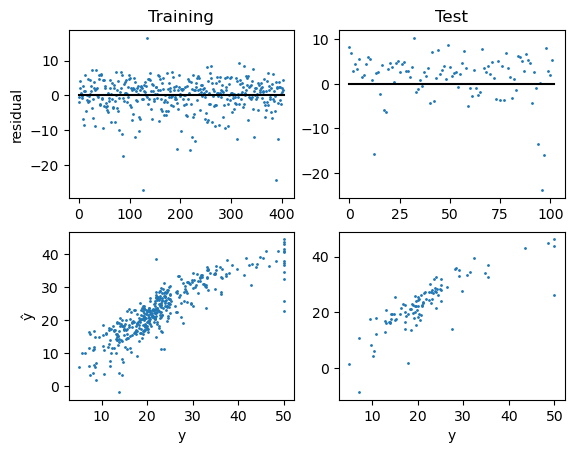

In [34]:
print('Linear Regression, Label = mv, Default, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(LinearRegression(), X_train_minmax, X_test_minmax, X_minmax, mv_train, mv_test, mv)

sum_array = np.array([['LinearRegression()','Default','mv','MinMax',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]])

In [35]:
pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                     'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])

Predictor Parameters Label DataScale         Train RMSE  \
0  LinearRegression()    Default    mv    MinMax  4.696882181263369   

           Test RMSE CV10 Train Avg RMSE CV10 Train Std RMSE  \
0  5.447606501288052   4.866105063839283  0.7776992985373661   

   CV10 All Avg RMSE   CV10 All Std RMSE      Accuracy Train  \
0  5.154728385946124  2.6514954341431536  0.7446750310344625   

        Accuracy Test        Accuracy All  
0  0.5975765944860534  0.7325478099044136

Linear Regression, Label = mv, Default, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        4.6969
RMSE - test:                         5.0987

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      74.47 %
Accuracy  test:                      64.75 %
Accuracy   all:                      73.44 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8661 Std: 0.7777 



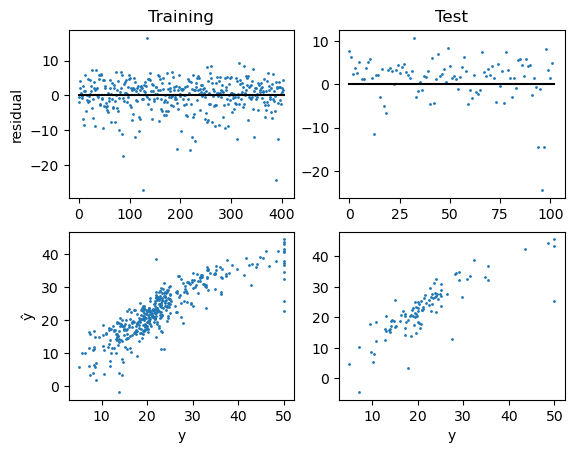

In [36]:
print('Linear Regression, Label = mv, Default, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(LinearRegression(), X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['LinearRegression()','Default','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [37]:
#Prove this approach works to get data into a dataframe:
pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                     'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])

Predictor Parameters Label       DataScale         Train RMSE  \
0  LinearRegression()    Default    mv          MinMax  4.696882181263369   
1  LinearRegression()    Default    mv  StandardScaler   4.69688218126337   

           Test RMSE CV10 Train Avg RMSE CV10 Train Std RMSE  \
0  5.447606501288052   4.866105063839283  0.7776992985373661   
1  5.098689889098564   4.866105063839281   0.777699298537364   

    CV10 All Avg RMSE   CV10 All Std RMSE      Accuracy Train  \
0   5.154728385946124  2.6514954341431536  0.7446750310344625   
1  5.1547283859461235   2.651495434143157  0.7446750310344625   

        Accuracy Test        Accuracy All  
0  0.5975765944860534  0.7325478099044136  
1  0.6474757726011554  0.7344231429946857

Linear Regression, Label = lmv, Default, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.1879
RMSE - test:                         0.2147

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      79.0 %
Accuracy  test:                      70.63 %
Accuracy   all:                      78.65 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1963 Std: 0.0182 



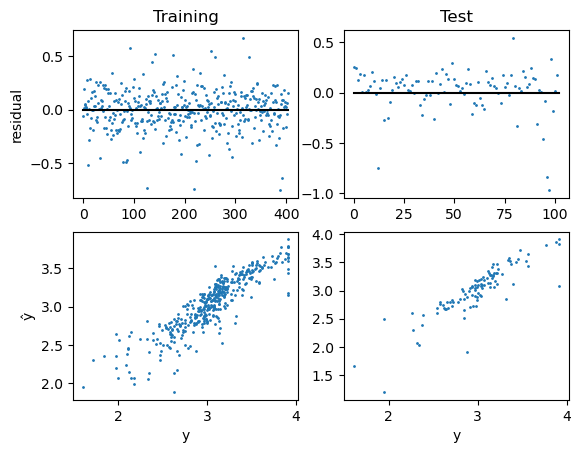

In [38]:
print('Linear Regression, Label = lmv, Default, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(LinearRegression(), X_train_minmax, X_test_minmax, X_minmax, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['LinearRegression()','Default','lmv','MinMax',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Linear Regression, Label = lmv, Default, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.1879
RMSE - test:                         0.2012

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      79.0 %
Accuracy  test:                      74.2 %
Accuracy   all:                      78.64 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1963 Std: 0.0182 



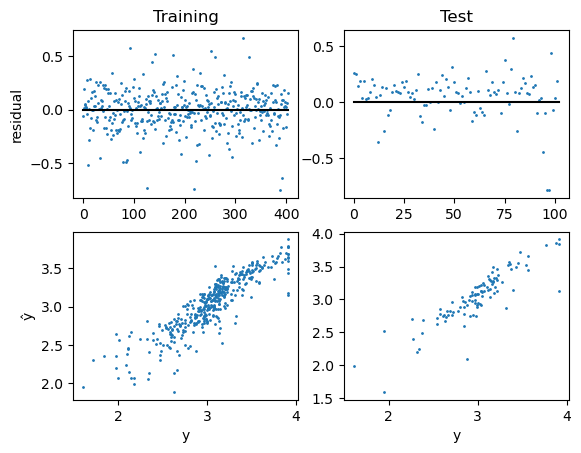

In [39]:
print('Linear Regression, Label = lmv, Default, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(LinearRegression(), X_train_ss, X_test_ss, X_ss, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['LinearRegression()','Default','lmv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Stochastic Gradient Descent, Label = mv, Default, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        4.7048
RMSE - test:                         5.1317

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      74.38 %
Accuracy  test:                      64.29 %
Accuracy   all:                      73.28 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8738 Std: 0.8037 



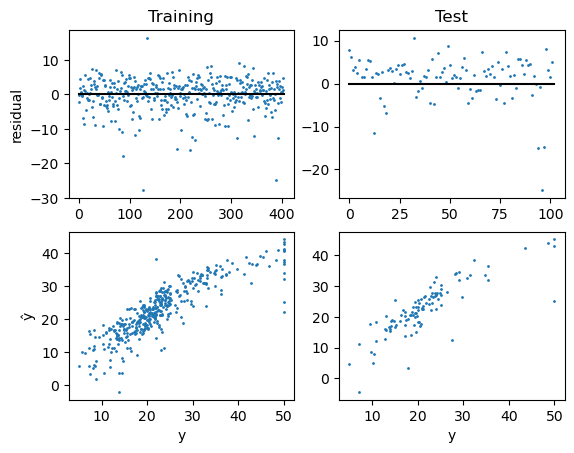

In [40]:
print('Stochastic Gradient Descent, Label = mv, Default, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
sgd_reg = SGDRegressor()
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(sgd_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['StochasticGradientDescent','Default','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Ridge Regression, alpha = 1, Label = mv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        4.7346
RMSE - test:                         5.2603

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      74.06 %
Accuracy  test:                      62.48 %
Accuracy   all:                      72.92 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8893 Std: 0.6932 



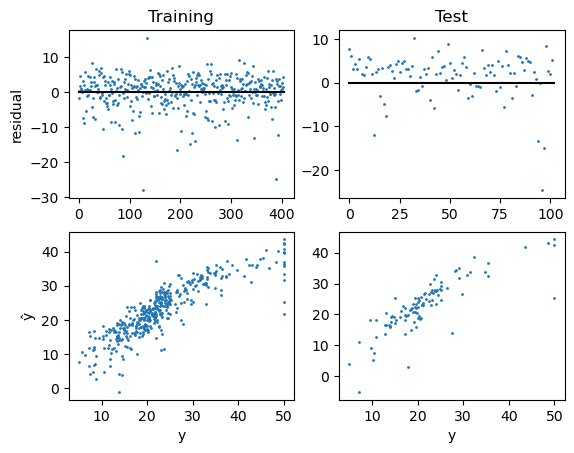

In [41]:
print('Ridge Regression, alpha = 1, Label = mv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ridge_reg, X_train_minmax, X_test_minmax, X_minmax, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['Ridge()','alpha = 1','mv','MinMax',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Ridge Regression, alpha = 1, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        4.6970
RMSE - test:                         5.0994

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      74.47 %
Accuracy  test:                      64.74 %
Accuracy   all:                      73.44 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8646 Std: 0.7782 



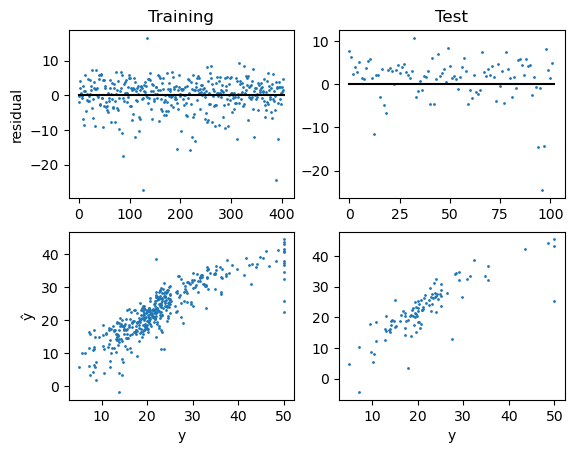

In [42]:
print('Ridge Regression, alpha = 1, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ridge_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['Ridge()','alpha = 1','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Ridge Regression, alpha = 1, Label = lmv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.1903
RMSE - test:                         0.2069

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      78.46 %
Accuracy  test:                      72.73 %
Accuracy   all:                      77.96 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1970 Std: 0.0152 



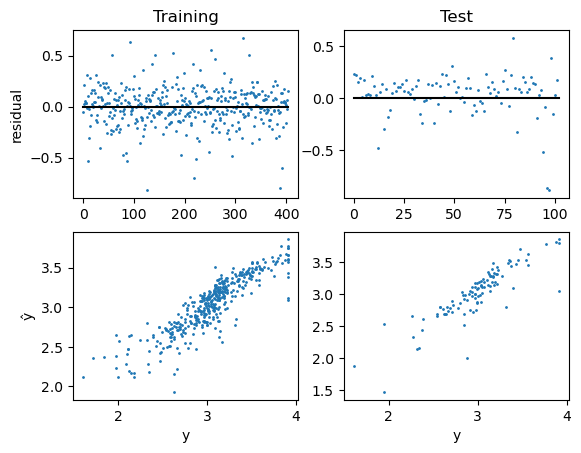

In [43]:
print('Ridge Regression, alpha = 1, Label = lmv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ridge_reg, X_train_minmax, X_test_minmax, X_minmax, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['Ridge()','alpha = 1','lmv','MinMax',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Ridge Regression, alpha = 1, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.1879
RMSE - test:                         0.2014

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      79.0 %
Accuracy  test:                      74.14 %
Accuracy   all:                      78.62 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1962 Std: 0.0182 



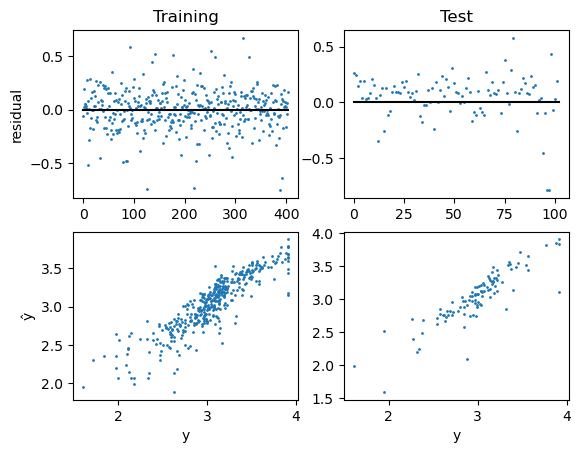

In [44]:
print('Ridge Regression, alpha = 1, Label = lmv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ridge_reg, X_train_ss, X_test_ss, X_ss, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['Ridge()','alpha = 1','lmv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Lasso, alpha = 0.1, Label = mv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        5.0691
RMSE - test:                         5.5642

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      70.26 %
Accuracy  test:                      58.02 %
Accuracy   all:                      68.88 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  5.1947 Std: 0.7018 



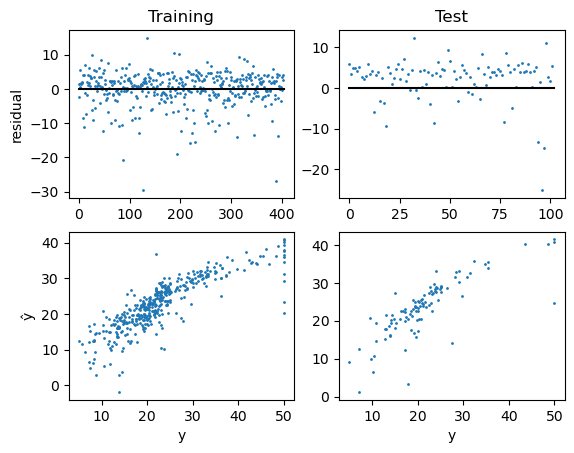

In [45]:
print('Lasso, alpha = 0.1, Label = mv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
lasso_reg = Lasso(alpha = 0.1)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(lasso_reg, X_train_minmax, X_test_minmax, X_minmax, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['Lasso()','alpha = 0.1','mv','MinMax',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Lasso, alpha = 0.1, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        4.7485
RMSE - test:                         5.1992

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      73.9 %
Accuracy  test:                      63.34 %
Accuracy   all:                      72.65 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.9045 Std: 0.8130 



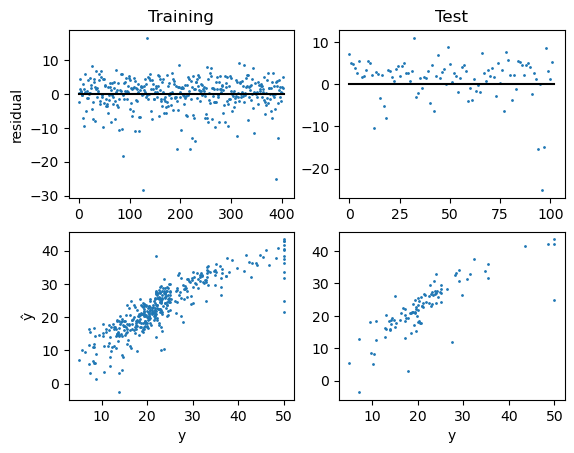

In [46]:
print('Lasso, alpha = 0.1, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
lasso_reg = Lasso(alpha = 0.1)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(lasso_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['Lasso()','alpha = 0.1','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Elastic Net, alpha = 0.1, l1_ratio = 0.5, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        4.7547
RMSE - test:                         5.1567

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      73.84 %
Accuracy  test:                      63.94 %
Accuracy   all:                      72.69 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8978 Std: 0.7781 



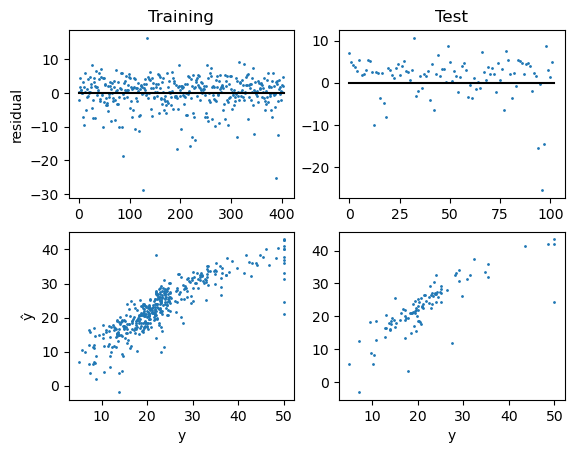

In [47]:
print('Elastic Net, alpha = 0.1, l1_ratio = 0.5, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(elastic_net, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['ElasticNet()','alpha = 0.1, l1_ratio = 0.5','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Next I will evaluate my top linear models from Assignment #2:

Ridge Regression, alpha = 10, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.1884
RMSE - test:                         0.2033

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      78.88 %
Accuracy  test:                      73.66 %
Accuracy   all:                      78.42 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1962 Std: 0.0178 



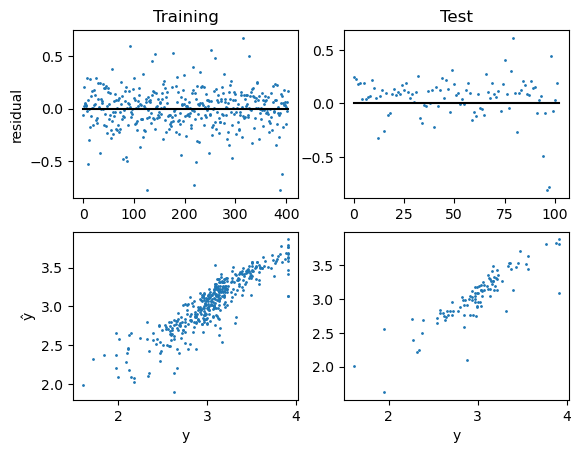

In [48]:
#Top model from Assignment #2
print('Ridge Regression, alpha = 10, Label = lmv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ridge_reg = Ridge(alpha = 10, solver = "cholesky")
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ridge_reg, X_train_ss, X_test_ss, X_ss, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['Ridge()','alpha = 10','lmv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Lasso, alpha = 0.001, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.1881
RMSE - test:                         0.2023

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      78.96 %
Accuracy  test:                      73.92 %
Accuracy   all:                      78.54 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1962 Std: 0.0180 



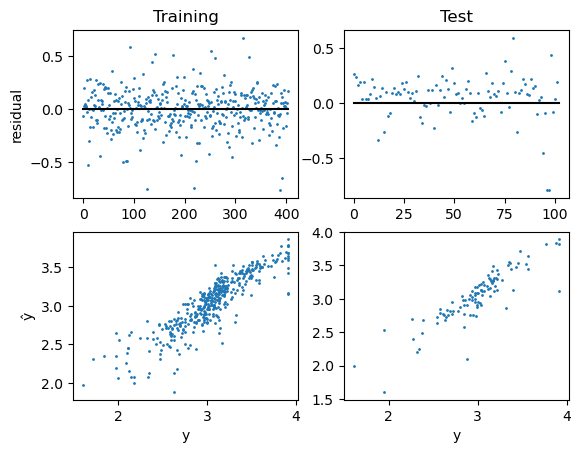

In [49]:
#Second best from Assignment #2:
print('Lasso, alpha = 0.001, Label = lmv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
lasso_reg = Lasso(alpha = 0.001)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(lasso_reg, X_train_ss, X_test_ss, X_ss, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['Lasso()','alpha = 0.001','lmv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [50]:
#Third Best from Assignment #2
#This was just straight up linear regression on the lmv labels with StandardScaled data. This has already been ran.

Random Forest Regressor, Default, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.3831
RMSE - test:                         3.2598

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.79 %
Accuracy  test:                      85.59 %
Accuracy   all:                      93.61 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.5891 Std: 1.0095 



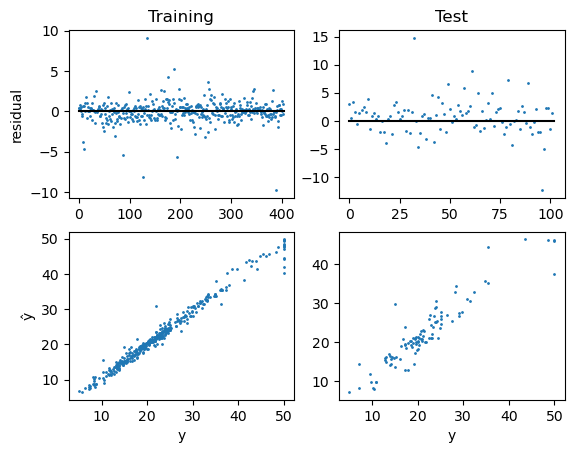

In [51]:
print('Random Forest Regressor, Default, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rand_forest_reg = RandomForestRegressor()
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all =  ml_model_eval(rand_forest_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['RandomForestRegressor()','Default','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Random Forest Regressor, Default, Label = mv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.3406
RMSE - test:                         5.4588

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.92 %
Accuracy  test:                      59.59 %
Accuracy   all:                      93.19 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.5532 Std: 0.9575 



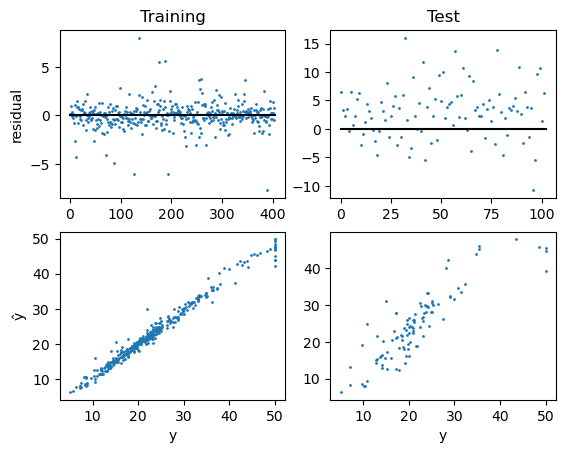

In [52]:
print('Random Forest Regressor, Default, Label = mv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rand_forest_reg = RandomForestRegressor()
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(rand_forest_reg, X_train_minmax, X_test_minmax, X_minmax, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['RandomForestRegressor()','Default','mv','MinMax',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Random Forest Regressor, n_estimators = 500, max_leaf_nodes = 16, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        2.5249
RMSE - test:                         3.5108

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      92.62 %
Accuracy  test:                      83.29 %
Accuracy   all:                      89.35 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.7655 Std: 0.9799 



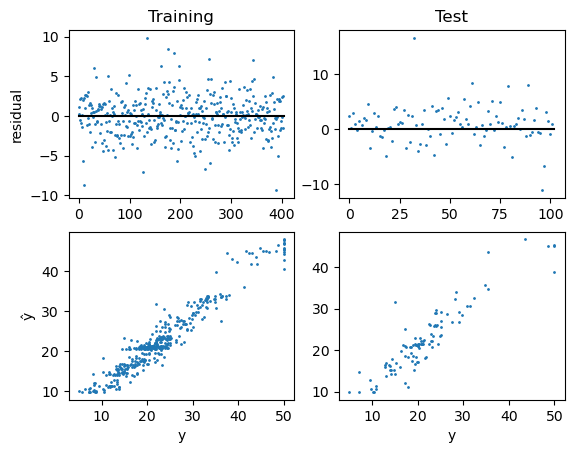

In [53]:
print('Random Forest Regressor, n_estimators = 500, max_leaf_nodes = 16, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rand_forest_reg = RandomForestRegressor(n_estimators = 500, max_leaf_nodes = 16)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(rand_forest_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['RandomForestRegressor()','n_estimators = 500, max_leaf_nodes = 16','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Gradient Boosting Regressor, n_estimators = 100, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.4033
RMSE - test:                         2.6817

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.72 %
Accuracy  test:                      90.25 %
Accuracy   all:                      94.55 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.2479 Std: 0.8127 



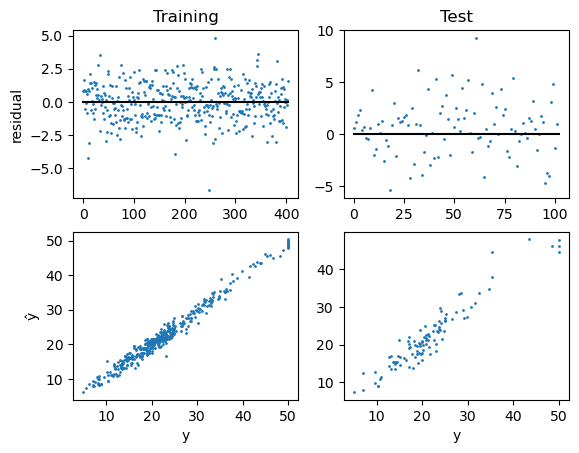

In [54]:
print('Gradient Boosting Regressor, n_estimators = 100, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
grb_m1 = GradientBoostingRegressor(n_estimators = 100, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(grb_m1, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 100','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

GradientBoostingRegressor, n_estimators = 400, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.4603
RMSE - test:                         2.7869

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      99.75 %
Accuracy  test:                      89.47 %
Accuracy   all:                      95.73 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.2868 Std: 0.8176 



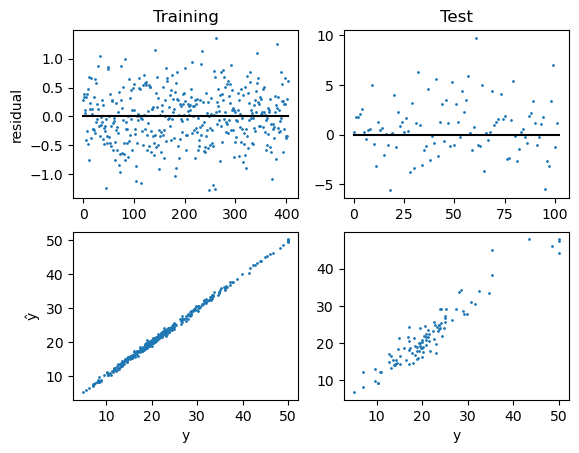

In [55]:
#Gradient Boosting Default
print('GradientBoostingRegressor, n_estimators = 400, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr = GradientBoostingRegressor(n_estimators = 400, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(gbr, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 400','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Gradient Boosting Regressor, n_estimators = 100, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0697
RMSE - test:                         0.1509

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.11 %
Accuracy  test:                      85.49 %
Accuracy   all:                      92.04 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1550 Std: 0.0312 



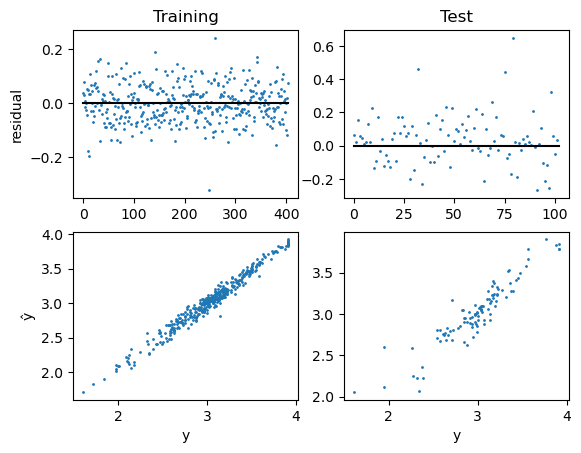

In [56]:
print('Gradient Boosting Regressor, n_estimators = 100, Label = lmv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
grb_m1 = GradientBoostingRegressor(n_estimators = 100, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(grb_m1, X_train_ss, X_test_ss, X_ss, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 100','lmv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [57]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])

In [58]:
#mv_df = test[test['Label'] == 'mv']
#mv_df.sort_values(by = ['Train RMSE'])

I haven't looked at just Decision Trees yet, So I will start looking at some Decision trees and the impact of their parameters on performance:

Decision Tree Regressor, Default, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0000
RMSE - test:                         3.5957

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      100.0 %
Accuracy  test:                      82.47 %
Accuracy   all:                      91.87 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8471 Std: 0.8832 



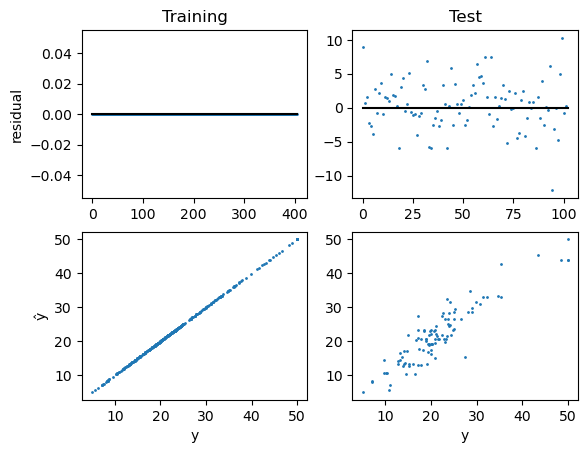

In [59]:
print('Decision Tree Regressor, Default, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
tree_reg = DecisionTreeRegressor()
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(tree_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['DecisionTreeRegressor()','Default','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [60]:
tree_reg.get_depth()

19

This is fun! The single Decision Tree regressor perfectly fit the training data... and then it poorly generalized. This model is clearly overfitting the data. This is where cross-validation really helps us look at the performance of the model. The CV10 Mean RMSE for a Default Decision tree is 5.0160 with a high standard deviation of 1.3942. This is a clear sign of high overfitting with a single decision tree. Will look at regularizing this model. Max Tree Depth is 19 nodes. 

Decision Tree Regressor, max_depth = 3, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        3.8186
RMSE - test:                         4.0326

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      83.12 %
Accuracy  test:                      77.95 %
Accuracy   all:                      81.2 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  5.2425 Std: 1.2952 



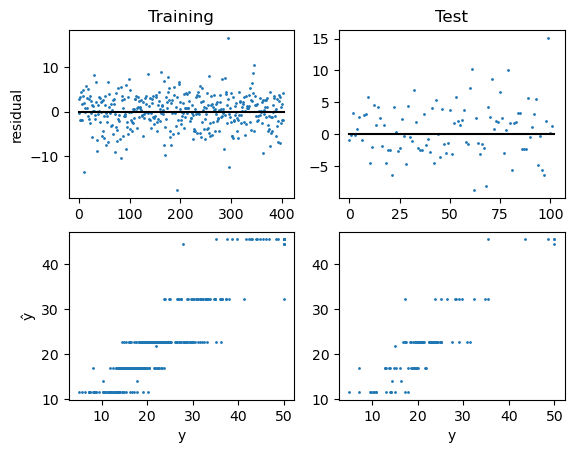

In [61]:
print('Decision Tree Regressor, max_depth = 3, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
tree_reg = DecisionTreeRegressor(max_depth = 3)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(tree_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['DecisionTreeRegressor()','max_depth = 3','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

So regularizing the decision tree with a max depth of 3 did not improve the performance. You can see that the predictions are stratified based on the y_hat vs. y scatter plots. I will try looking at a couple different regularized models before attempting a GridSearch to find the optimal single Decision Tree.

Decision Tree Regressor, max_features = 5, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0000
RMSE - test:                         3.9648

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      100.0 %
Accuracy  test:                      78.68 %
Accuracy   all:                      91.69 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.6762 Std: 1.1633 



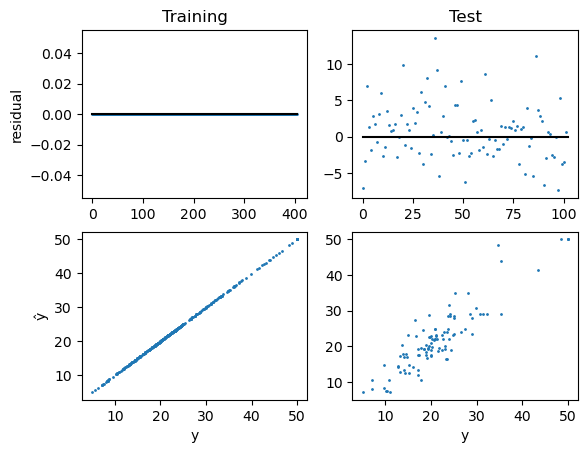

In [62]:
print('Decision Tree Regressor, max_features = 5, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
tree_reg = DecisionTreeRegressor(max_features = 5)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(tree_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['DecisionTreeRegressor()','max_features = 5','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

So this is again pretty interesting. Only allowing the Decision Tree to consider 5 features enabled the model to overfit the data. This is important because it starts to indicate the importance of feature size... Cleary 5 features is enough to predict the labels so why would any other features be needed? Perhaps this can help reduce the amount of data needed to make accurate predictions making the model faster and more cost effective. 

Decision Tree Regressor, max_leaf_nodes = 7, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        3.8972
RMSE - test:                         5.3431

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      82.42 %
Accuracy  test:                      61.29 %
Accuracy   all:                      78.69 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.8172 Std: 1.2629 



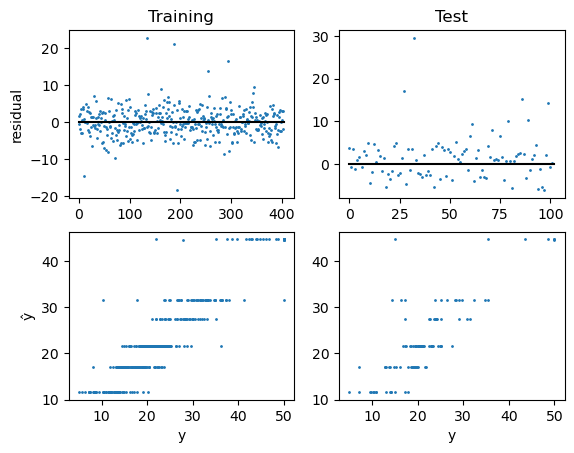

In [63]:
print('Decision Tree Regressor, max_leaf_nodes = 7, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
tree_reg = DecisionTreeRegressor(max_leaf_nodes = 7)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(tree_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['DecisionTreeRegressor()','max_leaf_nodes = 7','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

So clearly regularizing the Decision Trees help. So now let's run a GridSearch to find the optimum single Decision Tree.

In [64]:
#Use GridSearch to optimize a single decision tree:
param_grid = [
    {'max_depth':[1,2,5,10,19],
    'min_samples_split':[100,50,25,10,5,2],
    'max_features': [1,3,6,9,12,"auto","sqrt","log2"],
    'max_leaf_nodes':[20,15,10,5]}
]

tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error',
                          return_train_score = True, n_jobs = -1)

grid_search.fit(X_ss , mv)

#Because grid_search uses cross-validation for evaluating the different models, will use all data here. 


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 5, 10, 19],
                          'max_features': [1, 3, 6, 9, 12, 'auto', 'sqrt',
                                           'log2'],
                          'max_leaf_nodes': [20, 15, 10, 5],
                          'min_samples_split': [100, 50, 25, 10, 5, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
print('DecisionTreeRegressor GridSearchCV Results')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('Best Estimator: ',grid_search.best_estimator_, '\n')
print('Parameters: ', grid_search.best_params_, '\n' )
print('Best Score: ', grid_search.best_score_)

DecisionTreeRegressor GridSearchCV Results
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best Estimator:  DecisionTreeRegressor(max_depth=19, max_features=9, max_leaf_nodes=20,
                      min_samples_split=50) 

Parameters:  {'max_depth': 19, 'max_features': 9, 'max_leaf_nodes': 20, 'min_samples_split': 50} 

Best Score:  -25.29135124643173


Decision Tree Regressor, Best Estimate GridCV, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        2.9142
RMSE - test:                         3.6367

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      90.17 %
Accuracy  test:                      82.07 %
Accuracy   all:                      85.87 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  5.2342 Std: 1.3509 



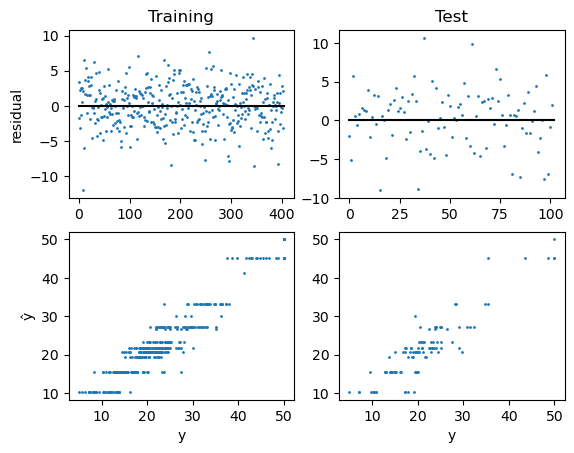

In [66]:
#Now re-conduct analysis with best Decision Tree:
print('Decision Tree Regressor, Best Estimate GridCV, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
tree_reg = DecisionTreeRegressor(max_depth = 19, max_features = 9, max_leaf_nodes = 15, min_samples_split = 10)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(tree_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['DecisionTreeRegressor()','Best Estimate GridCV','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [67]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])

In [68]:
trees = test[test['Predictor'] == 'DecisionTreeRegressor()']

In [69]:
trees.sort_values(by = ['CV10 All Avg RMSE'])

Predictor            Parameters Label       DataScale  \
24  DecisionTreeRegressor()  Best Estimate GridCV    mv  StandardScaler   
23  DecisionTreeRegressor()    max_leaf_nodes = 7    mv  StandardScaler   
20  DecisionTreeRegressor()               Default    mv  StandardScaler   
21  DecisionTreeRegressor()         max_depth = 3    mv  StandardScaler   
22  DecisionTreeRegressor()      max_features = 5    mv  StandardScaler   

            Train RMSE           Test RMSE CV10 Train Avg RMSE  \
24  2.9141558946741806  3.6367044185480166    5.23420022215689   
23   3.897191959555787  5.3430977535345905   4.817243995527496   
20                 0.0   3.595721858858734    4.84709421875788   
21  3.8186127592092123   4.032601639743802   5.242544510943819   
22                 0.0   3.964758974451057   4.676234646232759   

   CV10 Train Std RMSE  CV10 All Avg RMSE   CV10 All Std RMSE  \
24  1.3509198717955289  5.142984033941602   2.465215957691987   
23  1.2628960013489359  5.380801261092467   2.365601911965805   
20  0.8832231441084519  5.599428954750936  2.2030027832596524   
21  1.2952025319222857  5.751733720727378   2.197253365506393   
22  1.1632648112864308  6.022816933415342   2.035128966934432   

        Accuracy Train       Accuracy Test        Accuracy All  
24  0.9017122219927529  0.8206556161329168  0.8587195888122334  
23   0.824216725216313  0.6128689436923453  0.7868657811750959  
20                 1.0  0.8246749572741889  0.9187105726415571  
21  0.8312339079747152  0.7794828262572109  0.8120324037968553  
22                 1.0  0.7868401751957994  0.9168537337781376

Very interesting to see here that our Best Estimate Tree did score the best based on the cross-validation scores. The second best was max_leaf_nodes = 7. However, the R^2 accuracy scores were not the highest for the Best Estimate. The R^2 values are being inflated by models that are overfitting the training data. So clearly, we need to take into account both how well a model predicts and how well it generalizes. This is why Cross Validation is so powerful. 

BaggingRegressor, n_estimators = 500, max_samples = 300, bootstrap = True, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.7754
RMSE - test:                         3.4167

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      96.35 %
Accuracy  test:                      84.17 %
Accuracy   all:                      92.67 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.5145 Std: 0.9777 



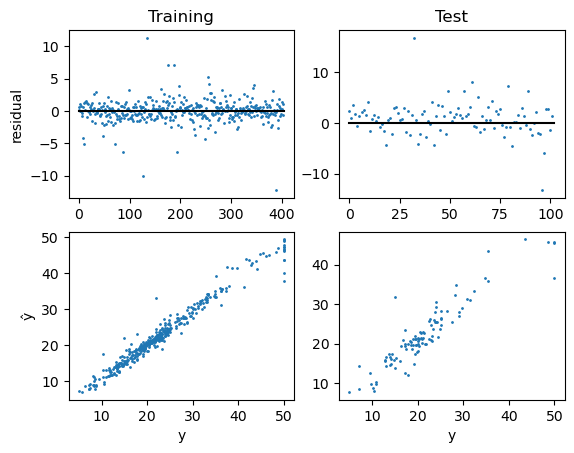

In [70]:
#Now look into Bagging and Pasting with Random Forests:
print('BaggingRegressor, n_estimators = 500, max_samples = 300, bootstrap = True, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
bag_reg = BaggingRegressor(DecisionTreeRegressor(),n_estimators = 500,
                           max_samples = 300, bootstrap = True, n_jobs = -1)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(bag_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['BaggingRegressor()','n_estimators = 500, max_samples = 300, bootstrap = True','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

BaggingRegressor, n_estimators = 500, max_samples = 300, bootstrap = False, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.0043
RMSE - test:                         3.3128

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.83 %
Accuracy  test:                      85.12 %
Accuracy   all:                      93.36 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.8059 Std: 1.1981 



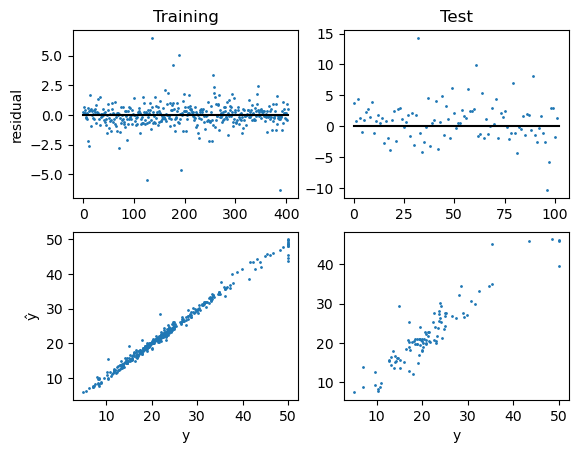

In [71]:
#Now look into Bagging and Pasting with Random Forests:
print('BaggingRegressor, n_estimators = 500, max_samples = 300, bootstrap = False, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
bag_reg = BaggingRegressor(DecisionTreeRegressor(),n_estimators = 500,
                           max_samples = 300, bootstrap = False, n_jobs = -1)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(bag_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['PastingRegressor()','n_estimators = 500, max_samples = 300, bootstrap = False','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

It looks like Pasting here actually outperformed Bagging which was not expected. Pasting, i.e. sampling the training data multiple times without replacement out performed Bagging i.e. sampling the training data multiple times with replacement. 

This was true with max_samples set to 100, but I increased the max_samples and set that parameter value to 300 and then bagging significant out performed pasting! This goes to show how fine turning hyperparameters can have a meaningful impact on results!

RandomForests naturally use bagging within their algorithm, so using the BaggingRegressior with the DecisionTreeRegresser predictor can be redundant.

ExtraTreesRegressor, n_estimators = 500, max_leaf_nodes = 16, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        2.8038
RMSE - test:                         3.5987

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      90.9 %
Accuracy  test:                      82.44 %
Accuracy   all:                      89.32 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.5875 Std: 0.7408 



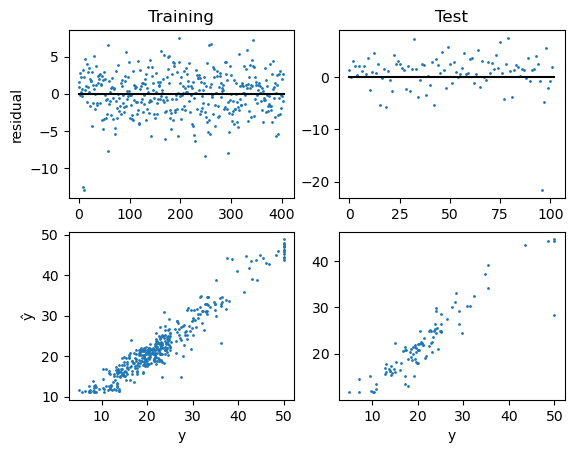

In [72]:
#Now consider looking at Extra-Trees
print('ExtraTreesRegressor, n_estimators = 500, max_leaf_nodes = 16, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
extree_reg = ExtraTreesRegressor(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(extree_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['ExtraTreesRegressor()','n_estimators = 500, max_leaf_nodes = 16','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

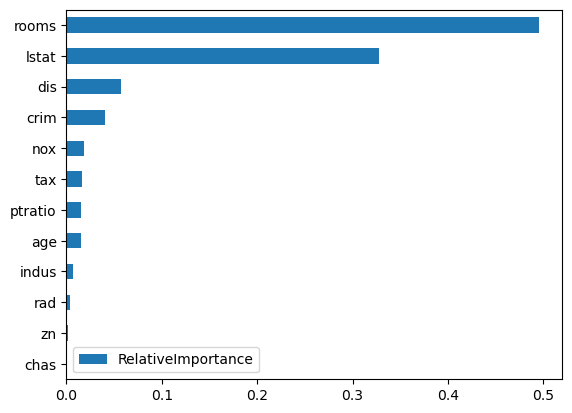

In [73]:
#Now let's look at the important features outputted from the RandomForestRegressor:
rnd_forest_reg = RandomForestRegressor(n_estimators = 500, n_jobs = -1)
rnd_forest_reg.fit(X_train_ss, mv_train)
feat_impor = pd.DataFrame(rnd_forest_reg.feature_importances_, 
                          columns = ['RelativeImportance'],
                         index = feature_cols)
feat_impor = feat_impor.sort_values(by = ['RelativeImportance'])
feat_impor.plot.barh()
plt.show()

So Initially, it looks like an arbitrary RandomForestRegressor model will predict the top three features as rooms, lstat, and dis. It will be interesting to see how these relative feature importances may change with tweaking the model.

Random Forest Regressor, max_features = 1, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.3828
RMSE - test:                         4.0600

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.79 %
Accuracy  test:                      77.65 %
Accuracy   all:                      92.05 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.8078 Std: 0.6179 



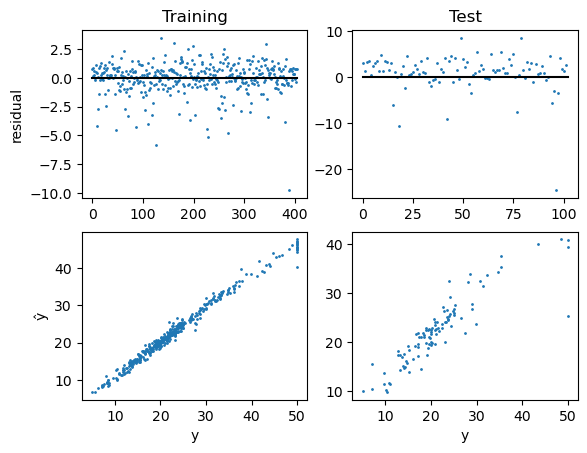

Random Forest Regressor, max_features = 2, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2965
RMSE - test:                         3.6499

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.05 %
Accuracy  test:                      81.94 %
Accuracy   all:                      93.59 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.4644 Std: 0.6942 



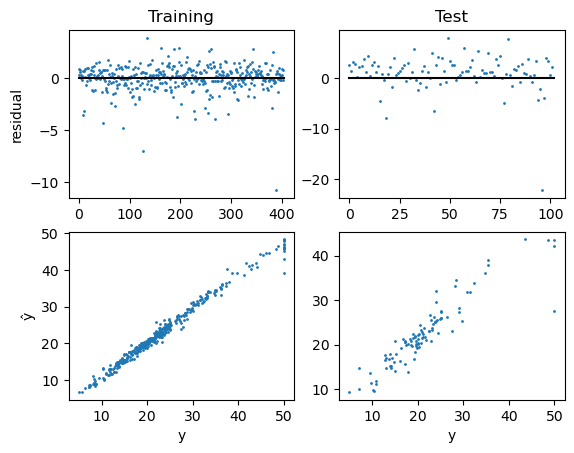

Random Forest Regressor, max_features = 3, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2456
RMSE - test:                         3.3287

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.2 %
Accuracy  test:                      84.97 %
Accuracy   all:                      94.15 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.3232 Std: 0.7019 



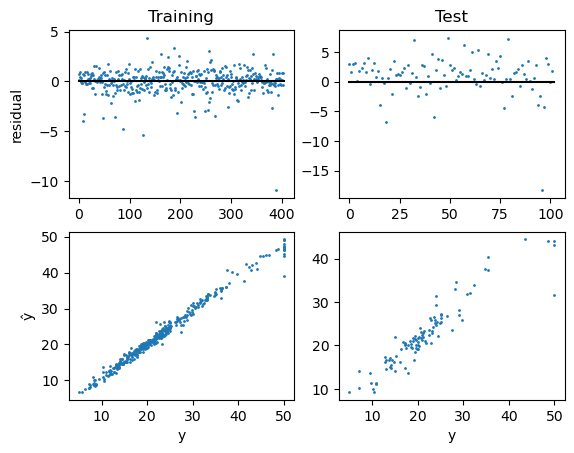

Random Forest Regressor, max_features = 4, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2035
RMSE - test:                         3.2454

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.32 %
Accuracy  test:                      85.72 %
Accuracy   all:                      94.64 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.2836 Std: 0.7775 



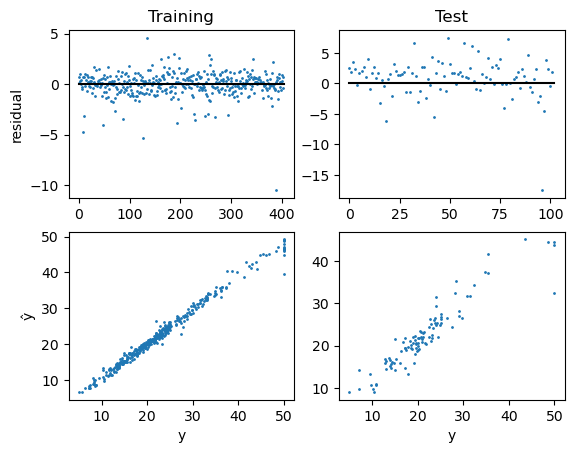

Random Forest Regressor, max_features = 5, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2504
RMSE - test:                         3.2370

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.19 %
Accuracy  test:                      85.79 %
Accuracy   all:                      94.63 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.2933 Std: 0.8109 



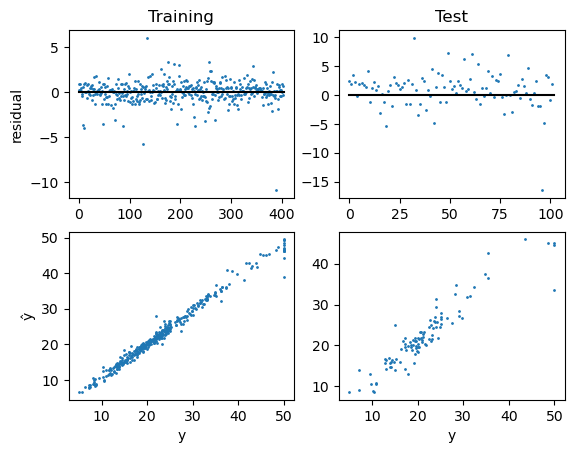

Random Forest Regressor, max_features = 6, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2487
RMSE - test:                         3.1666

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.2 %
Accuracy  test:                      86.4 %
Accuracy   all:                      94.71 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.2967 Std: 0.8292 



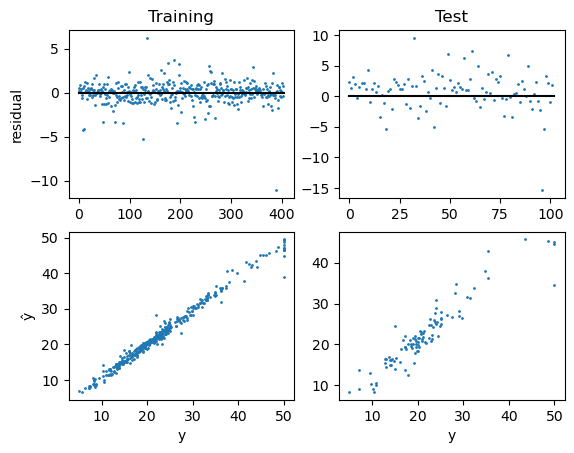

Random Forest Regressor, max_features = 7, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2568
RMSE - test:                         3.1658

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.17 %
Accuracy  test:                      86.41 %
Accuracy   all:                      94.54 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.3245 Std: 0.8500 



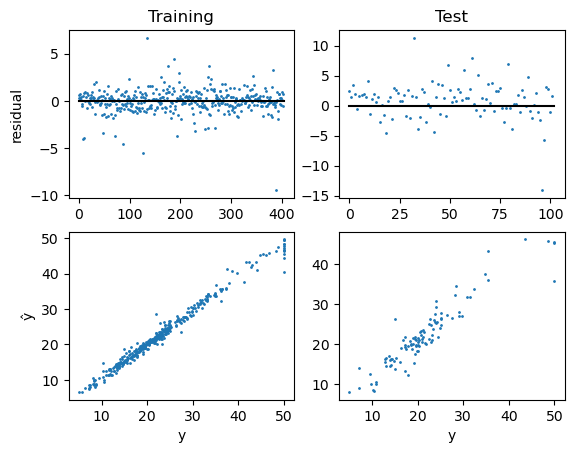

Random Forest Regressor, max_features = 8, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2730
RMSE - test:                         3.1762

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.12 %
Accuracy  test:                      86.32 %
Accuracy   all:                      94.39 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.3813 Std: 0.8629 



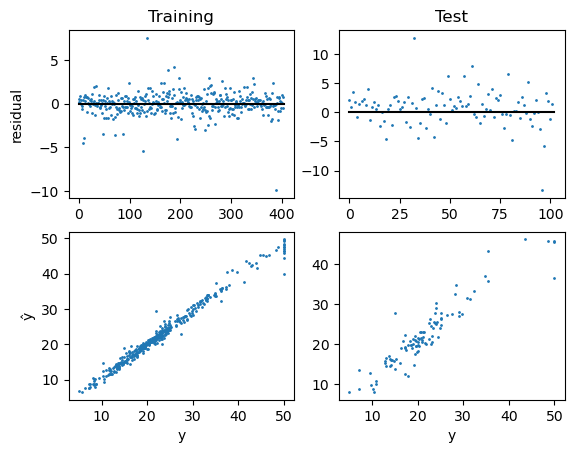

Random Forest Regressor, max_features = 9, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.3004
RMSE - test:                         3.2162

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.04 %
Accuracy  test:                      85.97 %
Accuracy   all:                      94.31 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.4189 Std: 0.9161 



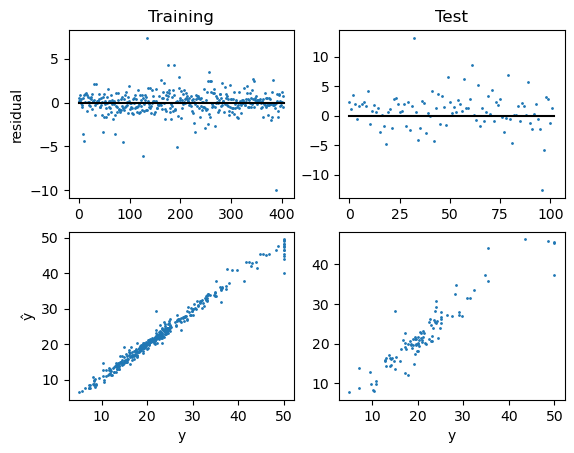

Random Forest Regressor, max_features = 10, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2987
RMSE - test:                         3.1407

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.05 %
Accuracy  test:                      86.62 %
Accuracy   all:                      94.31 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.4416 Std: 0.9632 



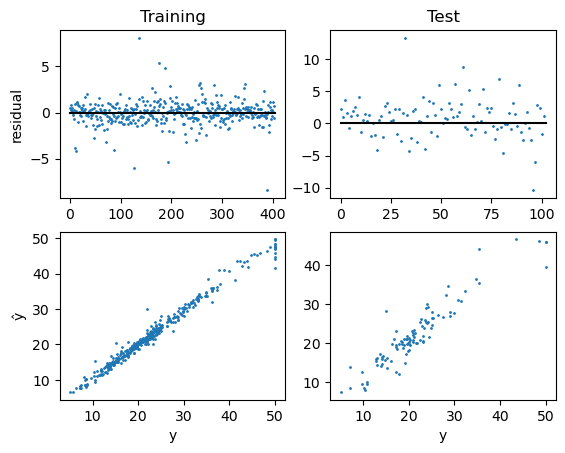

Random Forest Regressor, max_features = 11, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.3227
RMSE - test:                         3.2354

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.98 %
Accuracy  test:                      85.81 %
Accuracy   all:                      94.14 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.4904 Std: 1.0066 



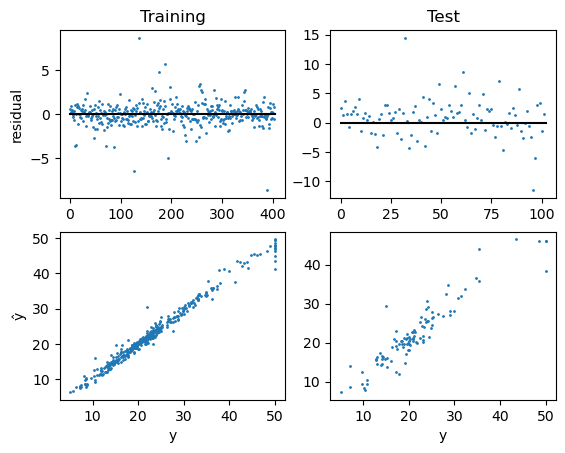

Random Forest Regressor, max_features = 12, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.3231
RMSE - test:                         3.2557

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.97 %
Accuracy  test:                      85.63 %
Accuracy   all:                      94.02 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.5197 Std: 0.9685 



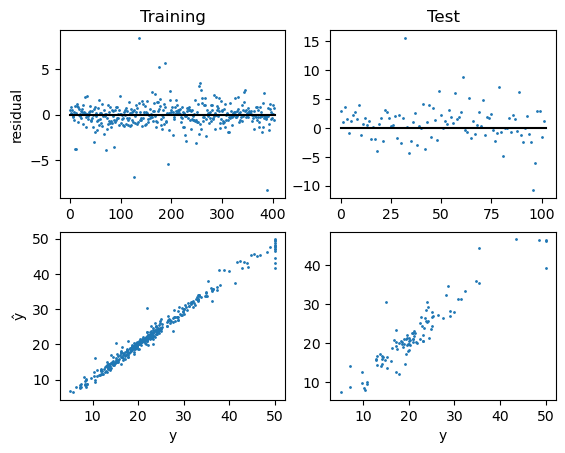

Random Forest Regressor, max_features = auto, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.3484
RMSE - test:                         3.2673

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.9 %
Accuracy  test:                      85.52 %
Accuracy   all:                      93.85 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.5347 Std: 1.0004 



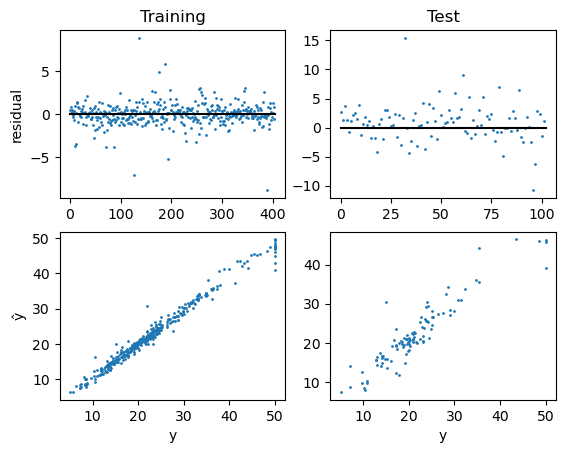

Random Forest Regressor, max_features = sqrt, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2922
RMSE - test:                         3.4391

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.07 %
Accuracy  test:                      83.96 %
Accuracy   all:                      94.1 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.3237 Std: 0.7889 



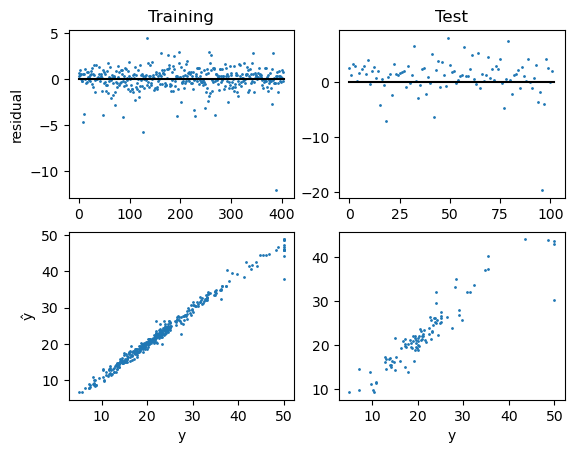

Random Forest Regressor, max_features = log2, n_estimators = 500, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2391
RMSE - test:                         3.3963

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.22 %
Accuracy  test:                      84.36 %
Accuracy   all:                      94.35 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.3115 Std: 0.7572 



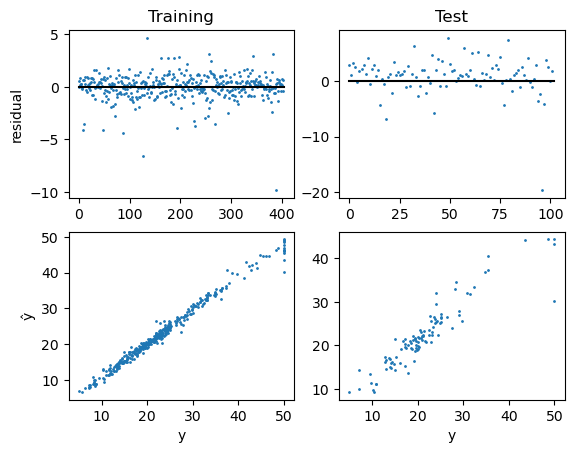

In [74]:
#Now let's look at how max_features impacts the RandomForestRegressor model:
mfl = [1,2,3,4,5,6,7,8,9,10,11,12,'auto','sqrt','log2']

for i in mfl:
    print('Random Forest Regressor, max_features = {}, n_estimators = 500, Label = mv, StandardScaler Scaled Data:'.format(i),'\n')
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    rand_forest_reg = RandomForestRegressor(n_estimators = 500, max_features = i)
    rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(rand_forest_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
    sum_array = np.vstack((sum_array,[['RandomForestRegressor()','n_estimators = 500, max_features = {}'.format(i),'mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [75]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])

In [76]:
bl = []
for i in range(len(test)):
    a = 'max_features' in test['Parameters'][i]
    bl.append(a)
mf_df = test[bl]
mf_df.sort_values(by = ['CV10 All Avg RMSE'])

Predictor                               Parameters Label  \
32  RandomForestRegressor()     n_estimators = 500, max_features = 5    mv   
33  RandomForestRegressor()     n_estimators = 500, max_features = 6    mv   
34  RandomForestRegressor()     n_estimators = 500, max_features = 7    mv   
31  RandomForestRegressor()     n_estimators = 500, max_features = 4    mv   
35  RandomForestRegressor()     n_estimators = 500, max_features = 8    mv   
36  RandomForestRegressor()     n_estimators = 500, max_features = 9    mv   
30  RandomForestRegressor()     n_estimators = 500, max_features = 3    mv   
42  RandomForestRegressor()  n_estimators = 500, max_features = log2    mv   
41  RandomForestRegressor()  n_estimators = 500, max_features = sqrt    mv   
37  RandomForestRegressor()    n_estimators = 500, max_features = 10    mv   
38  RandomForestRegressor()    n_estimators = 500, max_features = 11    mv   
40  RandomForestRegressor()  n_estimators = 500, max_features = auto    mv   
39  RandomForestRegressor()    n_estimators = 500, max_features = 12    mv   
29  RandomForestRegressor()     n_estimators = 500, max_features = 2    mv   
28  RandomForestRegressor()     n_estimators = 500, max_features = 1    mv   
22  DecisionTreeRegressor()                         max_features = 5    mv   

         DataScale          Train RMSE           Test RMSE  \
32  StandardScaler   1.250371834240274   3.236966204794303   
33  StandardScaler   1.248661236391732   3.166550210882381   
34  StandardScaler    1.25679879676285  3.1657937141248134   
31  StandardScaler  1.2035381126552946  3.2453675740335335   
35  StandardScaler  1.2730141337987897  3.1761585515074255   
36  StandardScaler  1.3003749664105804  3.2162222551480815   
30  StandardScaler   1.245625725576439  3.3286958662220854   
42  StandardScaler  1.2390559481610488  3.3962529657625704   
41  StandardScaler  1.2921728511896124  3.4391258907677567   
37  StandardScaler   1.298722498541476  3.1406673684450737   
38  StandardScaler  1.3226672271445936   3.235396094913327   
40  StandardScaler  1.3483822519692754  3.2673332512172397   
39  StandardScaler  1.3230908441528784  3.2557084731223718   
29  StandardScaler  1.2965125821767371  3.6498685998373332   
28  StandardScaler   1.382842491434449    4.06003621923139   
22  StandardScaler                 0.0   3.964758974451057   

   CV10 Train Avg RMSE CV10 Train Std RMSE   CV10 All Avg RMSE  \
32  3.2932740752699594  0.8109470087909791  3.8848650048464513   
33    3.29665329786475  0.8292083847139683  3.8984030625642214   
34   3.324492625432555   0.849952097518618  3.8996349726836828   
31  3.2836336050866928  0.7774762783858578   3.907199326102604   
35  3.3813129311840973  0.8629049679001439  3.9465051551943686   
36  3.4188979674262696    0.91609426703368  3.9793101928106767   
30   3.323159142792524    0.70186472755474   4.008240618287679   
42  3.3115171845153695  0.7571908366195655   4.011652347286783   
41   3.323730488129308  0.7889227997258039   4.015967643312298   
37   3.441622254366396   0.963154839597583   4.036922130951804   
38  3.4903980452601404   1.006643793597383   4.094602848029423   
40  3.5346664700526143  1.0003583720118157   4.153987795127528   
39  3.5196837989262164   0.968522028782687    4.18326471467792   
29   3.464397608564897  0.6942107326535916    4.27740523261401   
28  3.8077816087412515  0.6178940280274694   4.915188691672634   
22   4.676234646232759  1.1632648112864308   6.022816933415342   

     CV10 All Std RMSE      Accuracy Train       Accuracy Test  \
32  1.8175355086986809  0.9819052611444833  0.8579150419488129   
33   1.858815477572019  0.9819547370646464  0.8640295513041893   
34   1.855055319876461  0.9817187676810374  0.8640945109036365   
31  1.8207583175214062  0.9832353824382924  0.8571765372981205   
35  1.9197328808485175  0.9812439921336166  0.8632031425021648   
36  1.9573097746315908  0.9804290838704955  0.8597302966534814   
30   1.858335619752796  0.9820423669324245  0.84974

Based on this study, the max_features hyperparameters that performed the best with n_estimators = 500 and the RandomForestRegressor() model were 5, 7, and 4. The worst performers were 11, 2,and 1. The range of differences were about 1.0 Avg RMSE score when cross-validated with all data and about 0.5 Avg RMSE score when just cross-validated with the training data. Generally, as the Avg RMSE scores improved, so did the standard deviation indicating a better overall model. 

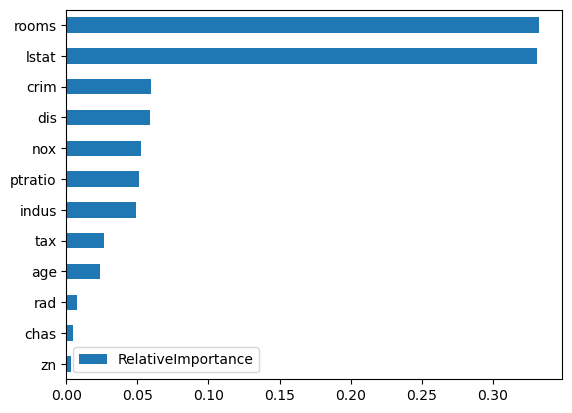

In [77]:
#Now let's look at the important features outputted from the RandomForestRegressor with max_features = 5:
rnd_forest_reg = RandomForestRegressor(n_estimators = 500, n_jobs = -1, max_features = 5)
rnd_forest_reg.fit(X_train_ss, mv_train)
feat_impor = pd.DataFrame(rnd_forest_reg.feature_importances_, 
                          columns = ['RelativeImportance'],
                         index = feature_cols)
feat_impor = feat_impor.sort_values(by = ['RelativeImportance'])
feat_impor.plot.barh()
plt.show()

With an optimized model, it is clear that rooms and lstat are jockeying for position for the top spot in terms of most important features. Likewise, rad, zn, and chas are battling for the least important feature. 

In [78]:
#Next, let's turn to some boosting techniques to look at the impact on performance:
from sklearn.ensemble import AdaBoostRegressor

AdaBoostRegressor, n_estimators = 200, learning_rate = 0.5 , Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        5.9205
RMSE - test:                         6.4282

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      59.43 %
Accuracy  test:                      43.97 %
Accuracy   all:                      58.32 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  6.2370 Std: 0.6295 



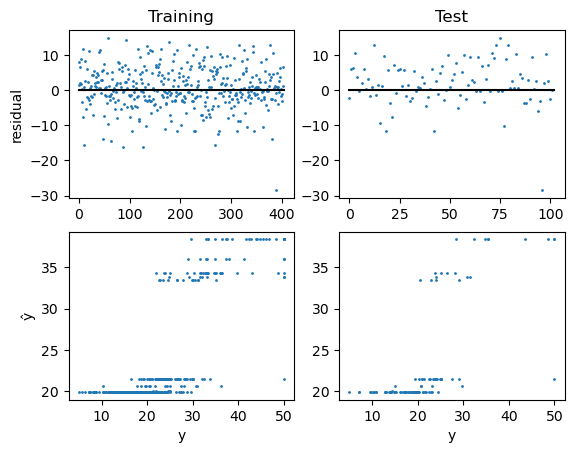

In [79]:
#Use AdaBoost with Decision Stumps
print('AdaBoostRegressor, n_estimators = 200, learning_rate = 0.5 , Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), n_estimators = 200,
                           learning_rate = 0.5)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ada_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['AdaBoostRegressor()','n_estimators = 200, learning_rate = 0.5','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

THis is a pretty bad predictor. It looks like the model is very poor predicting home values around the 25-30K range. There is clearly a gap here. Maybe try improving the model with more estimators, and a higher learning rate:

AdaBoostRegressor, n_estimators = 500, learning_rate = 1 , Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        6.4853
RMSE - test:                         6.9649

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      51.32 %
Accuracy  test:                      34.22 %
Accuracy   all:                      48.49 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  6.1645 Std: 0.5686 



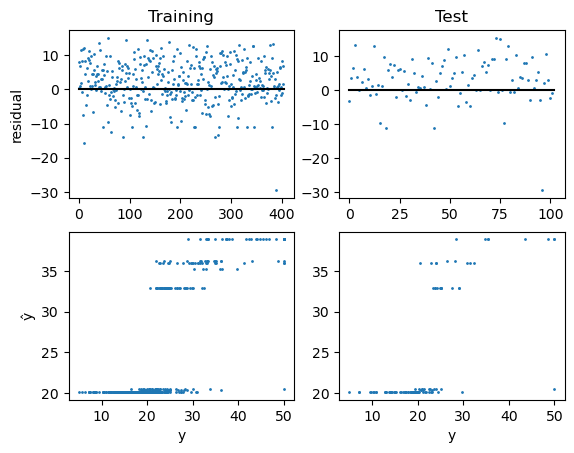

In [80]:
#Use AdaBoost with Decision Stumps
print('AdaBoostRegressor, n_estimators = 500, learning_rate = 1 , Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), n_estimators = 500,
                           learning_rate = 1)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ada_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['AdaBoostRegressor()','n_estimators = 500, learning_rate = 1','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

This made things even worse!! There appears to be two classes with this model, either you are rich or poor!

AdaBoostRegressor, n_estimators = 1000, learning_rate = 0.1 , Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        5.9426
RMSE - test:                         6.1697

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      59.13 %
Accuracy  test:                      48.38 %
Accuracy   all:                      56.96 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  6.1571 Std: 0.6722 



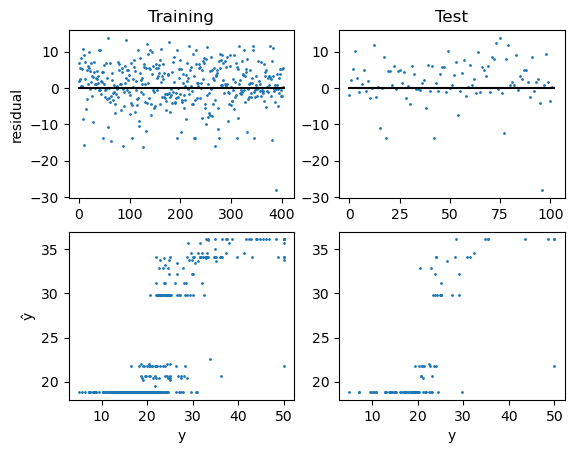

In [81]:
#Use AdaBoost with Decision Stumps
print('AdaBoostRegressor, n_estimators = 1000, learning_rate = 0.1 , Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), n_estimators = 1000,
                           learning_rate = 0.1)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(ada_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['AdaBoostRegressor()','n_estimators = 1000, learning_rate = 0.1','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

This seems to be a bit finicky. We aren't starting off at a great spot, so I will just move onto other methods.

GradientBoostingRegressor, n_estimators = 100, learning_rate = 1.0 , Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.6131
RMSE - test:                         4.1943

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      99.57 %
Accuracy  test:                      76.14 %
Accuracy   all:                      84.44 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  4.3359 Std: 1.5996 



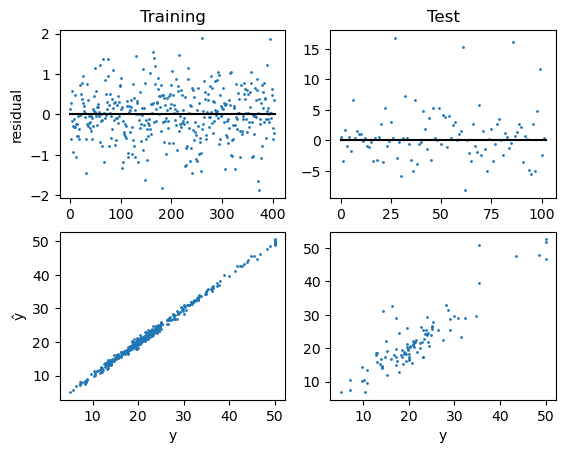

In [82]:
#Come back and look at a Gradient Boost example
print('GradientBoostingRegressor, n_estimators = 100, learning_rate = 1.0 , Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 1, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(gbr, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 100, learning_rate = 1.0','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

So Gradient Boosting looks like it has a lot of potential, but unfortunately it severly overfits the training data. However, this may be a good model package to fine tune with GridSearchCV to understand if this can be optimized to better generalize.

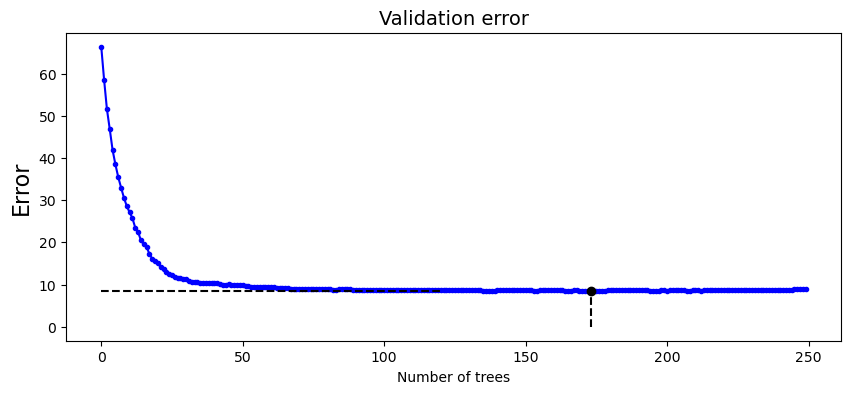

Optimal number of estimators:  173


In [83]:
#This will be a good opportunity to find the optimal number of trees for GBRT instead of using GridSearchCV:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 250, random_state = seed)
gbrt.fit(X_train_ss, mv_train)

errors = [mean_squared_error(mv_test, mv_pred) for mv_pred in gbrt.staged_predict(X_test_ss)]

bst_n_estimators = np.argmin(errors) + 1

min_error = np.min(errors)

plt.figure(figsize = (10,4))
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)
plt.show()

print("Optimal number of estimators: ", np.argmin(errors) + 1)

GradientBoostingRegressor, n_estimators = 173, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.7134
RMSE - test:                         2.9175

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      96.6 %
Accuracy  test:                      88.46 %
Accuracy   all:                      92.03 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.5001 Std: 0.6644 



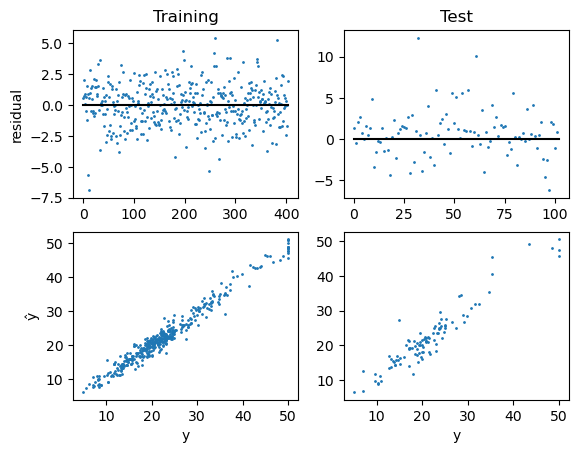

In [84]:
#Come back and look at a Gradient Boost example
print('GradientBoostingRegressor, n_estimators = 173, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators = 173, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(gbr, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 173','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

Still overfitting a ton. 

I think here will be a good time to stop, take stock in the top performing models. And start to optimize the top couple.

In [85]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])

In [86]:
mv_df = test[test['Label'] == 'mv']
mv_df.sort_values(by = ['CV10 All Avg RMSE'])

Predictor  \
17  GradientBoostingRegressor()   
32      RandomForestRegressor()   
33      RandomForestRegressor()   
34      RandomForestRegressor()   
47  GradientBoostingRegressor()   
31      RandomForestRegressor()   
18  GradientBoostingRegressor()   
35      RandomForestRegressor()   
36      RandomForestRegressor()   
30      RandomForestRegressor()   
42      RandomForestRegressor()   
41      RandomForestRegressor()   
37      RandomForestRegressor()   
25           BaggingRegressor()   
14      RandomForestRegressor()   
38      RandomForestRegressor()   
27        ExtraTreesRegressor()   
15      RandomForestRegressor()   
40      RandomForestRegressor()   
39      RandomForestRegressor()   
26           PastingRegressor()   
29      RandomForestRegressor()   
16      RandomForestRegressor()   
28      RandomForestRegressor()   
5                       Ridge()   
11                 ElasticNet()   
46  GradientBoostingRegressor()   
10                      Lasso()   
4     StochasticGradientDescent   
6                       Ridge()   
24      DecisionTreeRegressor()   
1            LinearRegression()   
0            LinearRegression()   
9                       Lasso()   
23      DecisionTreeRegressor()   
20      DecisionTreeRegressor()   
21      DecisionTreeRegressor()   
22      DecisionTreeRegressor()   
43          AdaBoostRegressor()   
45          AdaBoostRegressor()   
44          AdaBoostRegressor()   

                                           Parameters Label       DataScale  \
17                                 n_estimators = 100    mv  StandardScaler   
32               n_estimators = 500, max_features = 5    mv  StandardScaler   
33               n_estimators = 500, max_features = 6    mv  StandardScaler   
34               n_estimators = 500, max_features = 7    mv  StandardScaler   
47                                 n_estimators = 173    mv  StandardScaler   
31               n_estimators = 500, max_features = 4    mv  StandardScaler   
18                                 n_estimators = 400    mv  StandardScaler   
35               n_estimators = 500, max_features = 8    mv  StandardScaler   
36               n_estimators = 500, max_features = 9    mv  StandardScaler   
30               n_estimators = 500, max_features = 3    mv  StandardScaler   
42            n_estimators = 500, max_features = log2    mv  StandardScaler   
41            n_estimators = 500, max_features = sqrt    mv  StandardScaler   
37              n_estimators = 500, max_features = 10    mv  StandardScaler   
25  n_estimators = 500, max_samples = 300, bootstr...    mv  StandardScaler   
14                                            Default    mv  StandardScaler   
38              n_estimators = 500, max_features = 11    mv  StandardScaler   
27            n_estimators = 500, max_leaf_nodes = 16    mv  StandardScaler   
15                                            Default    mv          MinMax   
40            n_estimators = 500, max_features = auto    mv  StandardScaler   
39              n_estimators = 500, max_features = 12    mv  StandardScaler   
26  n_estimators = 500, max_samples = 300, bootstr...    mv  StandardScaler   
29               n_estimators = 500, max_features = 2    mv  StandardScaler   
16            n_estimators = 500, max_leaf_nodes = 16    mv  StandardScaler   
28               n_estimators = 500, max_features = 1    mv  StandardScaler   
5                                           alpha = 1    mv          MinMax   
11                        alpha = 0.1, l1_ratio = 0.5    mv  StandardScaler   
46            n_estimators = 100, learning_rate = 1.0    mv  StandardScaler   
10                                        alpha = 0.1    mv  StandardScaler   
4                                             Default    mv  StandardScaler   
6                                           alpha = 1    mv  StandardScaler   
24                               Best Estimate GridCV    mv  StandardScaler   
1                      

So GradientBoostingRegression() and RandomForestRegressor() are the top models with this dataset. I will now go through a GridSearchCV to optimize these models:

In [87]:
#Use RandomizedSearch because GridSearch would take too long to optimize RandomForestRegressor():
param_grid = [
    {'n_estimators':[10,100,250,500,1000],
     'bootstrap':[True, False],
     'max_features': [5,7,4,12,"auto","log2"],
     'max_depth': [10,25,50, None],
     'min_samples_split': [2,5,10],
     'min_samples_leaf': [1,2,4,10,15],
     'n_jobs':[-1]}
]

rand_for = RandomForestRegressor(random_state = seed)

rand_search = RandomizedSearchCV(estimator = rand_for, param_distributions = param_grid, cv = 10,
                                 scoring = 'neg_mean_squared_error',return_train_score = True, 
                                 random_state = seed, n_jobs = -1)

rand_search.fit(X_ss , mv)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 25, 50, None],
                                         'max_features': [5, 7, 4, 12, 'auto',
                                                          'log2'],
                                         'min_samples_leaf': [1, 2, 4, 10, 15],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [10, 100, 250, 500,
                                                          1000],
                                         'n_jobs': [-1]}],
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [88]:
rand_search.best_params_

{'n_jobs': -1,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 25,
 'bootstrap': True}

This isn't as good as models with 500 estimators!! Will try using n_estimators = 500 for this but hold all other parameters the same.

Random Forest Regressor, n_estimators = 500, max_features = 5, max_depth = 25, min_samples_leaf = 2, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.7975
RMSE - test:                         3.4596

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      96.26 %
Accuracy  test:                      83.77 %
Accuracy   all:                      92.61 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.3818 Std: 0.8407 



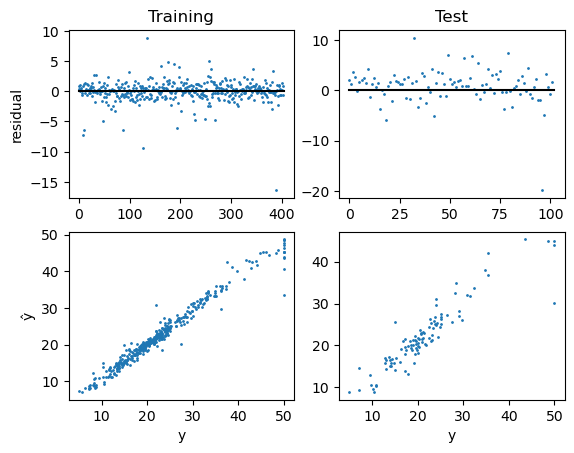

In [89]:
#Look at best estimator from rand
print('Random Forest Regressor, n_estimators = 500, max_features = 5, max_depth = 25, min_samples_leaf = 2, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rand_forest_reg = RandomForestRegressor(max_features = 5, max_depth = 25, min_samples_leaf = 2, n_estimators = 500)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(rand_forest_reg, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['RandomForestRegressor()','max_features = 5, max_depth = 25, min_samples_leaf = 2, n_estimators = 500','mv','StandardScaler',
                    rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                    rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [90]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])
mv_df = test[test['Label'] == 'mv']
mv_df.sort_values(by = ['CV10 All Avg RMSE'])

Predictor  \
17  GradientBoostingRegressor()   
32      RandomForestRegressor()   
33      RandomForestRegressor()   
34      RandomForestRegressor()   
47  GradientBoostingRegressor()   
31      RandomForestRegressor()   
18  GradientBoostingRegressor()   
35      RandomForestRegressor()   
48      RandomForestRegressor()   
36      RandomForestRegressor()   
30      RandomForestRegressor()   
42      RandomForestRegressor()   
41      RandomForestRegressor()   
37      RandomForestRegressor()   
25           BaggingRegressor()   
14      RandomForestRegressor()   
38      RandomForestRegressor()   
27        ExtraTreesRegressor()   
15      RandomForestRegressor()   
40      RandomForestRegressor()   
39      RandomForestRegressor()   
26           PastingRegressor()   
29      RandomForestRegressor()   
16      RandomForestRegressor()   
28      RandomForestRegressor()   
5                       Ridge()   
11                 ElasticNet()   
46  GradientBoostingRegressor()   
10                      Lasso()   
4     StochasticGradientDescent   
6                       Ridge()   
24      DecisionTreeRegressor()   
1            LinearRegression()   
0            LinearRegression()   
9                       Lasso()   
23      DecisionTreeRegressor()   
20      DecisionTreeRegressor()   
21      DecisionTreeRegressor()   
22      DecisionTreeRegressor()   
43          AdaBoostRegressor()   
45          AdaBoostRegressor()   
44          AdaBoostRegressor()   

                                           Parameters Label       DataScale  \
17                                 n_estimators = 100    mv  StandardScaler   
32               n_estimators = 500, max_features = 5    mv  StandardScaler   
33               n_estimators = 500, max_features = 6    mv  StandardScaler   
34               n_estimators = 500, max_features = 7    mv  StandardScaler   
47                                 n_estimators = 173    mv  StandardScaler   
31               n_estimators = 500, max_features = 4    mv  StandardScaler   
18                                 n_estimators = 400    mv  StandardScaler   
35               n_estimators = 500, max_features = 8    mv  StandardScaler   
48  max_features = 5, max_depth = 25, min_samples_...    mv  StandardScaler   
36               n_estimators = 500, max_features = 9    mv  StandardScaler   
30               n_estimators = 500, max_features = 3    mv  StandardScaler   
42            n_estimators = 500, max_features = log2    mv  StandardScaler   
41            n_estimators = 500, max_features = sqrt    mv  StandardScaler   
37              n_estimators = 500, max_features = 10    mv  StandardScaler   
25  n_estimators = 500, max_samples = 300, bootstr...    mv  StandardScaler   
14                                            Default    mv  StandardScaler   
38              n_estimators = 500, max_features = 11    mv  StandardScaler   
27            n_estimators = 500, max_leaf_nodes = 16    mv  StandardScaler   
15                                            Default    mv          MinMax   
40            n_estimators = 500, max_features = auto    mv  StandardScaler   
39              n_estimators = 500, max_features = 12    mv  StandardScaler   
26  n_estimators = 500, max_samples = 300, bootstr...    mv  StandardScaler   
29               n_estimators = 500, max_features = 2    mv  StandardScaler   
16            n_estimators = 500, max_leaf_nodes = 16    mv  StandardScaler   
28               n_estimators = 500, max_features = 1    mv  StandardScaler   
5                                           alpha = 1    mv          MinMax   
11                        alpha = 0.1, l1_ratio = 0.5    mv  StandardScaler   
46            n_estimators = 100, learning_rate = 1.0    mv  StandardScaler   
10                                        alpha = 0.1    mv  StandardScaler   
4                                             Default    mv  StandardScaler   
6                                           alpha = 1    mv  Standa

Still not as good as GradientBoostingRegression! So now let's try to optimize GradientBoostingRegression.

In [91]:
#Want to get specific here, will keep estimators at 100 and vary other parameters:
param_grid = [
    {'n_estimators':[100],
     'max_features': [5,7,4,12,"auto","log2"],
     'max_depth': [None],
     'learning_rate':[0.001,0.01,0.1,1,10]}
]

gbr = GradientBoostingRegressor(random_state = seed)

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 10,
                           scoring = 'neg_mean_squared_error', return_train_score = True, n_jobs = -1,
                           verbose = 2)

grid_search.fit(X_ss , mv)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.4s finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                          'max_depth': [None],
                          'max_features': [5, 7, 4, 12, 'auto', 'log2'],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [92]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=None, max_features=4, random_state=42)

In [93]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 4,
 'n_estimators': 100}

GradientBoostingRegressor, n_estimators = 100, max_depth = None, max_features = 4, Label = mv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0002
RMSE - test:                         3.2494

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      100.0 %
Accuracy  test:                      85.68 %
Accuracy   all:                      96.44 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.2857 Std: 0.8914 



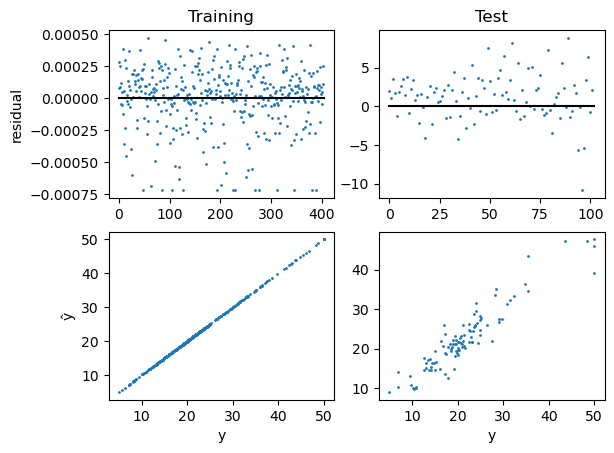

In [94]:
#Come back and look at a Gradient Boost example
print('GradientBoostingRegressor, n_estimators = 100, max_depth = None, max_features = 4, Label = mv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = None, max_features = 4, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(gbr, X_train_ss, X_test_ss, X_ss, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 100, max_depth = None, max_features = 4','mv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [95]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])
mv_df = test[test['Label'] == 'mv']
mv_df.sort_values(by = ['CV10 All Avg RMSE'])

Predictor  \
17  GradientBoostingRegressor()   
32      RandomForestRegressor()   
33      RandomForestRegressor()   
34      RandomForestRegressor()   
47  GradientBoostingRegressor()   
31      RandomForestRegressor()   
18  GradientBoostingRegressor()   
35      RandomForestRegressor()   
48      RandomForestRegressor()   
36      RandomForestRegressor()   
30      RandomForestRegressor()   
42      RandomForestRegressor()   
41      RandomForestRegressor()   
49  GradientBoostingRegressor()   
37      RandomForestRegressor()   
25           BaggingRegressor()   
14      RandomForestRegressor()   
38      RandomForestRegressor()   
27        ExtraTreesRegressor()   
15      RandomForestRegressor()   
40      RandomForestRegressor()   
39      RandomForestRegressor()   
26           PastingRegressor()   
29      RandomForestRegressor()   
16      RandomForestRegressor()   
28      RandomForestRegressor()   
5                       Ridge()   
11                 ElasticNet()   
46  GradientBoostingRegressor()   
10                      Lasso()   
4     StochasticGradientDescent   
6                       Ridge()   
24      DecisionTreeRegressor()   
1            LinearRegression()   
0            LinearRegression()   
9                       Lasso()   
23      DecisionTreeRegressor()   
20      DecisionTreeRegressor()   
21      DecisionTreeRegressor()   
22      DecisionTreeRegressor()   
43          AdaBoostRegressor()   
45          AdaBoostRegressor()   
44          AdaBoostRegressor()   

                                           Parameters Label       DataScale  \
17                                 n_estimators = 100    mv  StandardScaler   
32               n_estimators = 500, max_features = 5    mv  StandardScaler   
33               n_estimators = 500, max_features = 6    mv  StandardScaler   
34               n_estimators = 500, max_features = 7    mv  StandardScaler   
47                                 n_estimators = 173    mv  StandardScaler   
31               n_estimators = 500, max_features = 4    mv  StandardScaler   
18                                 n_estimators = 400    mv  StandardScaler   
35               n_estimators = 500, max_features = 8    mv  StandardScaler   
48  max_features = 5, max_depth = 25, min_samples_...    mv  StandardScaler   
36               n_estimators = 500, max_features = 9    mv  StandardScaler   
30               n_estimators = 500, max_features = 3    mv  StandardScaler   
42            n_estimators = 500, max_features = log2    mv  StandardScaler   
41            n_estimators = 500, max_features = sqrt    mv  StandardScaler   
49  n_estimators = 100, max_depth = None, max_feat...    mv  StandardScaler   
37              n_estimators = 500, max_features = 10    mv  StandardScaler   
25  n_estimators = 500, max_samples = 300, bootstr...    mv  StandardScaler   
14                                            Default    mv  StandardScaler   
38              n_estimators = 500, max_features = 11    mv  StandardScaler   
27            n_estimators = 500, max_leaf_nodes = 16    mv  StandardScaler   
15                                            Default    mv          MinMax   
40            n_estimators = 500, max_features = auto    mv  StandardScaler   
39              n_estimators = 500, max_features = 12    mv  StandardScaler   
26  n_estimators = 500, max_samples = 300, bootstr...    mv  StandardScaler   
29               n_estimators = 500, max_features = 2    mv  StandardScaler   
16            n_estimators = 500, max_leaf_nodes = 16    mv  StandardScaler   
28               n_estimators = 500, max_features = 1    mv  StandardScaler   
5                                           alpha = 1    mv          MinMax   
11                        alpha = 0.1, l1_ratio = 0.5    mv  StandardScaler   
46            n_estimators = 100, learning_rate = 1.0    mv  StandardScaler   
10                                        alpha = 0.1    mv  StandardScaler   
4                               

When I re-ran my code, it looks like the GradientBoosting models are bouncing around the leader board. I have to remember to set the random_state value. Will do this, re-run and check!

Now with top two estimators, will look at the important features for each!

Feature Importance for Top Peforming Model:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


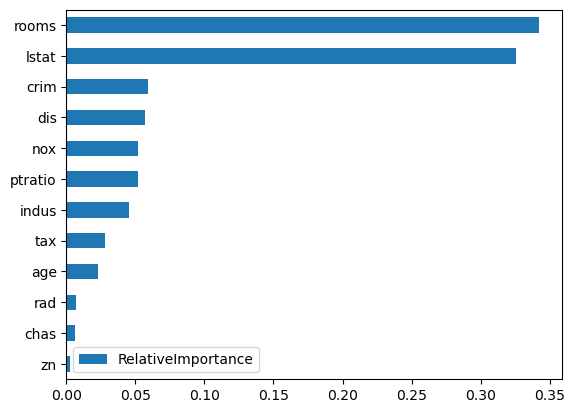

In [96]:
#Top EstimatorL RandomForestRegressor with n_estimators = 500 and max_features = 5
#Now let's look at the important features outputted from the RandomForestRegressor with max_features = 5:
print('Feature Importance for Top Peforming Model:')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rnd_forest_reg = RandomForestRegressor(n_estimators = 500, n_jobs = -1, max_features = 5)
rnd_forest_reg.fit(X_train_ss, mv_train)
feat_impor = pd.DataFrame(rnd_forest_reg.feature_importances_, 
                          columns = ['RelativeImportance'],
                         index = feature_cols)
feat_impor = feat_impor.sort_values(by = ['RelativeImportance'])
feat_impor.plot.barh()
plt.show()

Feature Importance for 2nd Top Peforming Model:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


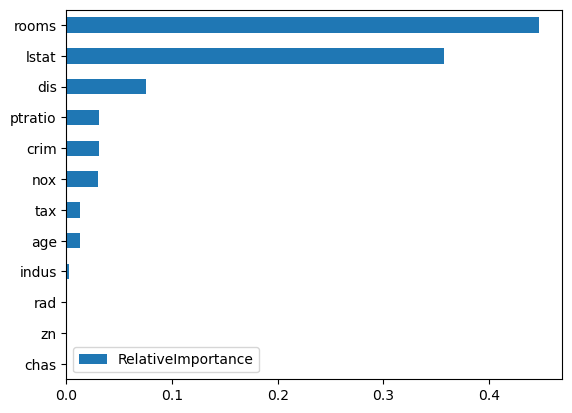

In [97]:
#Top Estimator GradientBoostingRegressor with n_estimators = 100
print('Feature Importance for 2nd Top Peforming Model:')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
grb_reg = GradientBoostingRegressor(n_estimators = 100, random_state = seed)
grb_reg.fit(X_train_ss, mv_train)
feat_impor = pd.DataFrame(grb_reg.feature_importances_, 
                          columns = ['RelativeImportance'],
                         index = feature_cols)
feat_impor = feat_impor.sort_values(by = ['RelativeImportance'])
feat_impor.plot.barh()
plt.show()

Based on the feature importances of these two models, it is clear that rooms and lstat have the most importance in determining a homes value. After that dis, ptratio, crim, nos, tax, age, and indus matter to varying degrees. But clearly rad, zn, and chas have little importance when it comes to predicting a homes value.

Random Forest Regressor, max_features = 1, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0598
RMSE - test:                         0.1836

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.87 %
Accuracy  test:                      78.52 %
Accuracy   all:                      92.0 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1620 Std: 0.0185 



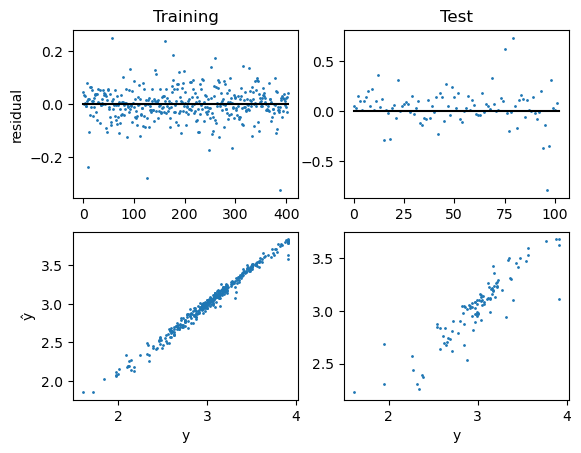

Random Forest Regressor, max_features = 2, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0564
RMSE - test:                         0.1674

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.11 %
Accuracy  test:                      82.14 %
Accuracy   all:                      93.37 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1506 Std: 0.0203 



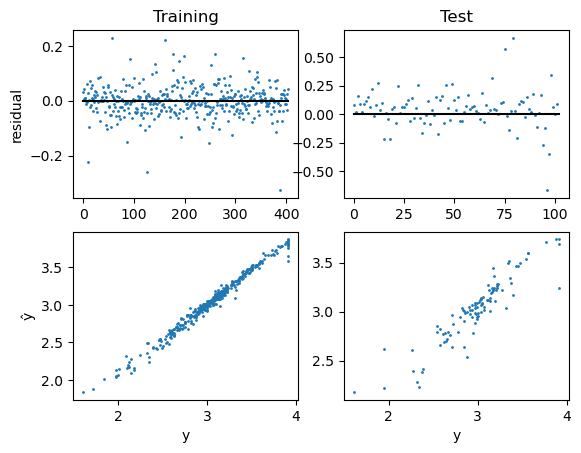

Random Forest Regressor, max_features = 3, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0552
RMSE - test:                         0.1618

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.19 %
Accuracy  test:                      83.31 %
Accuracy   all:                      93.7 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1485 Std: 0.0248 



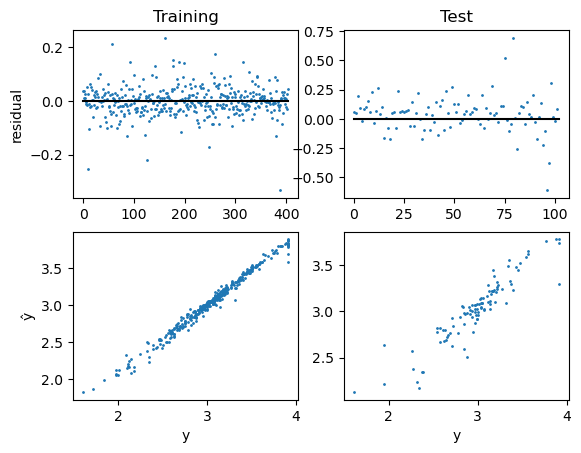

Random Forest Regressor, max_features = 4, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0541
RMSE - test:                         0.1568

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.26 %
Accuracy  test:                      84.32 %
Accuracy   all:                      94.05 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1488 Std: 0.0251 



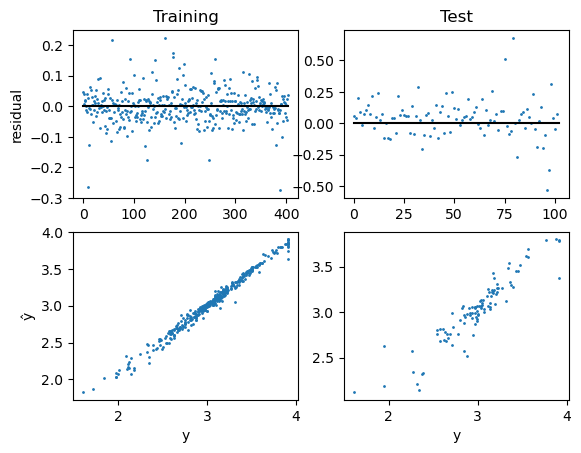

Random Forest Regressor, max_features = 5, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0555
RMSE - test:                         0.1553

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.17 %
Accuracy  test:                      84.64 %
Accuracy   all:                      93.89 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1498 Std: 0.0267 



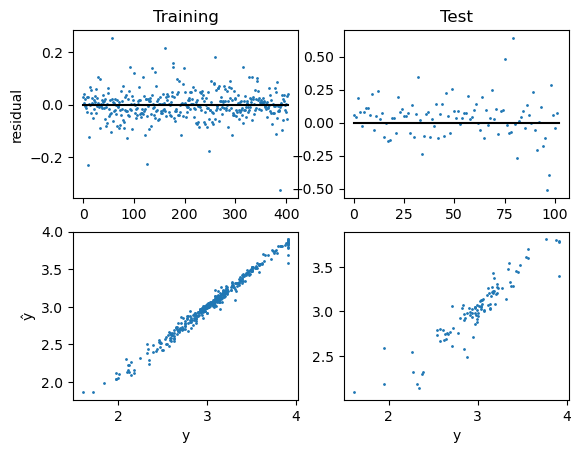

Random Forest Regressor, max_features = 6, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0570
RMSE - test:                         0.1549

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.07 %
Accuracy  test:                      84.7 %
Accuracy   all:                      93.78 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1521 Std: 0.0278 



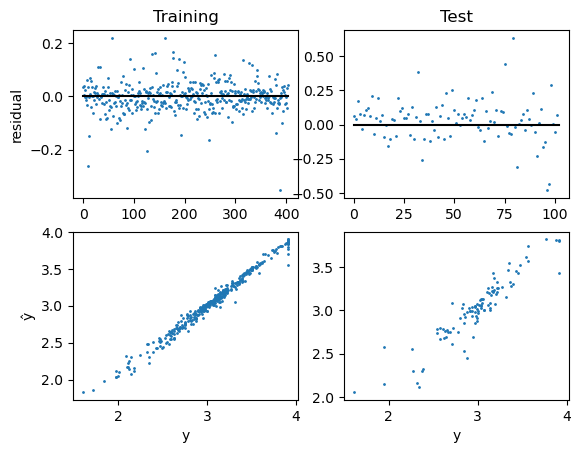

Random Forest Regressor, max_features = 7, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0574
RMSE - test:                         0.1556

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.04 %
Accuracy  test:                      84.57 %
Accuracy   all:                      93.85 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1522 Std: 0.0285 



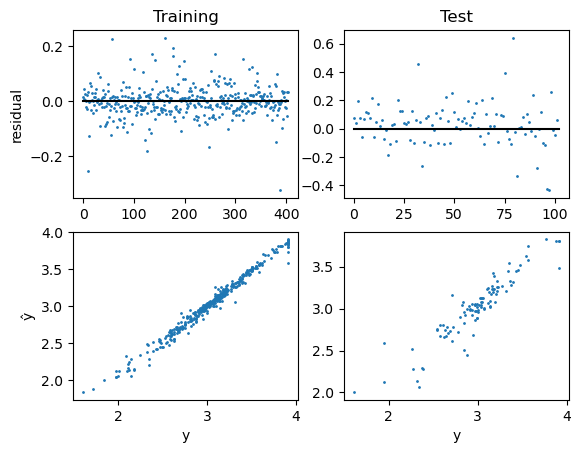

Random Forest Regressor, max_features = 8, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0572
RMSE - test:                         0.1550

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.06 %
Accuracy  test:                      84.7 %
Accuracy   all:                      93.76 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1540 Std: 0.0292 



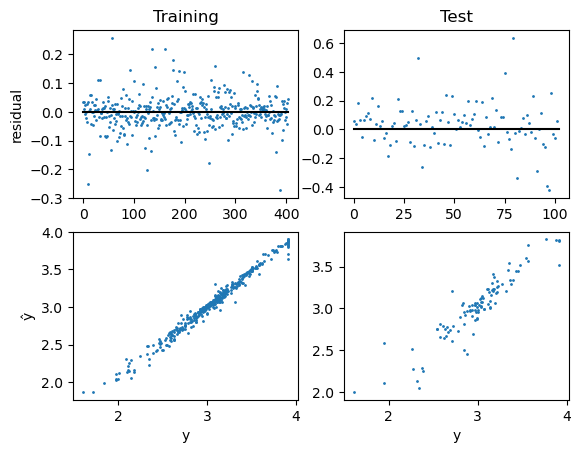

Random Forest Regressor, max_features = 9, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0581
RMSE - test:                         0.1583

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.99 %
Accuracy  test:                      84.02 %
Accuracy   all:                      93.52 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1556 Std: 0.0313 



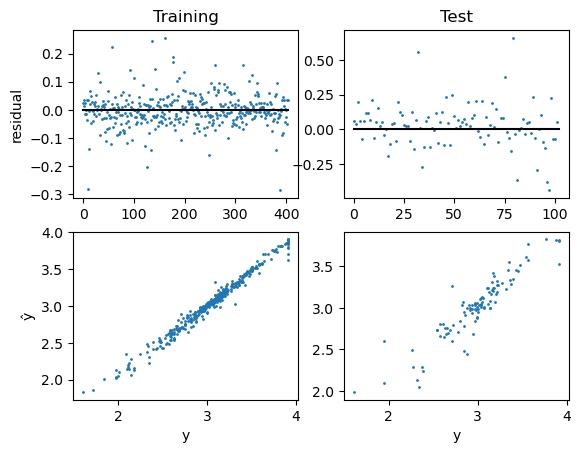

Random Forest Regressor, max_features = 10, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0584
RMSE - test:                         0.1588

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.97 %
Accuracy  test:                      83.93 %
Accuracy   all:                      93.36 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1580 Std: 0.0323 



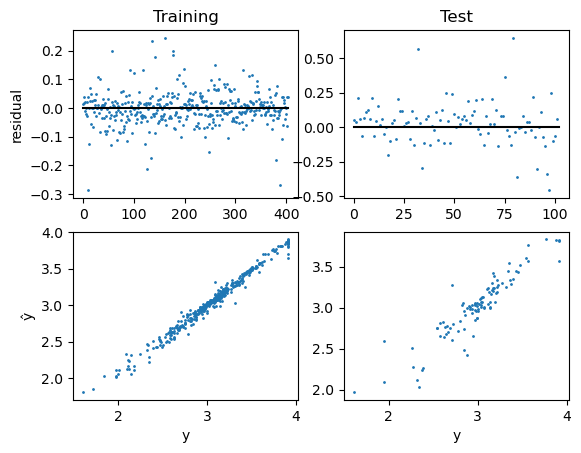

Random Forest Regressor, max_features = 11, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0592
RMSE - test:                         0.1599

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.92 %
Accuracy  test:                      83.71 %
Accuracy   all:                      93.07 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1588 Std: 0.0317 



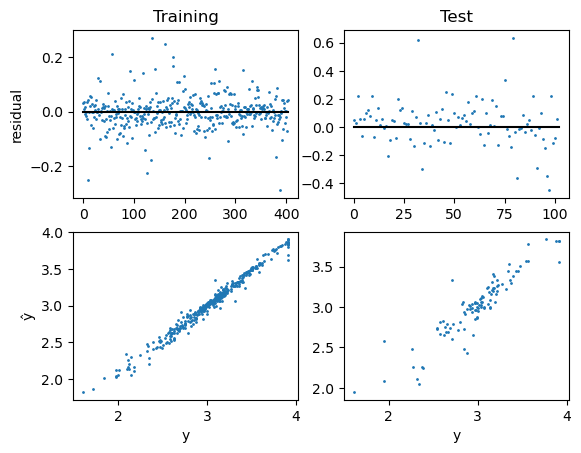

Random Forest Regressor, max_features = 12, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0602
RMSE - test:                         0.1593

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.85 %
Accuracy  test:                      83.82 %
Accuracy   all:                      93.0 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1597 Std: 0.0339 



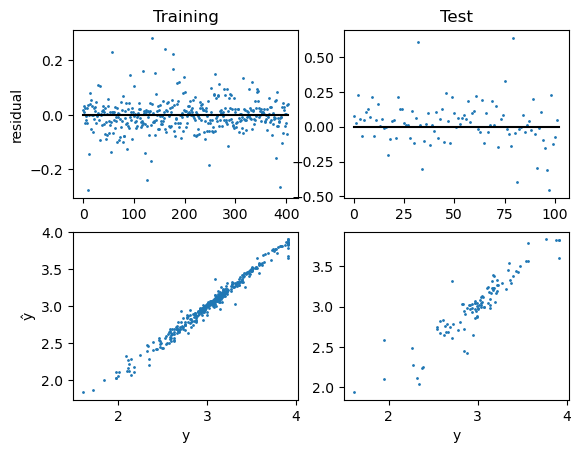

Random Forest Regressor, max_features = auto, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0597
RMSE - test:                         0.1604

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.88 %
Accuracy  test:                      83.59 %
Accuracy   all:                      92.98 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1598 Std: 0.0337 



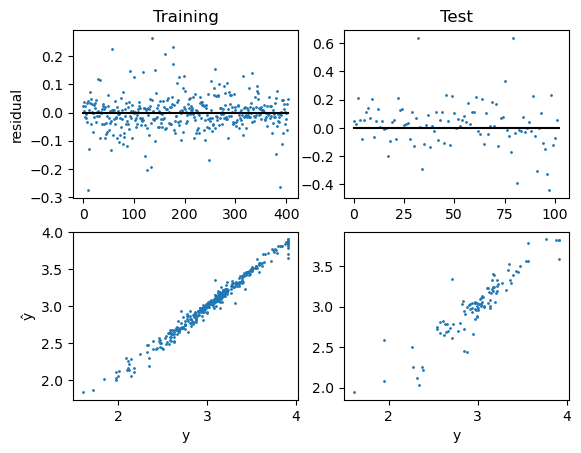

Random Forest Regressor, max_features = sqrt, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0552
RMSE - test:                         0.1653

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.19 %
Accuracy  test:                      82.58 %
Accuracy   all:                      93.74 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1490 Std: 0.0249 



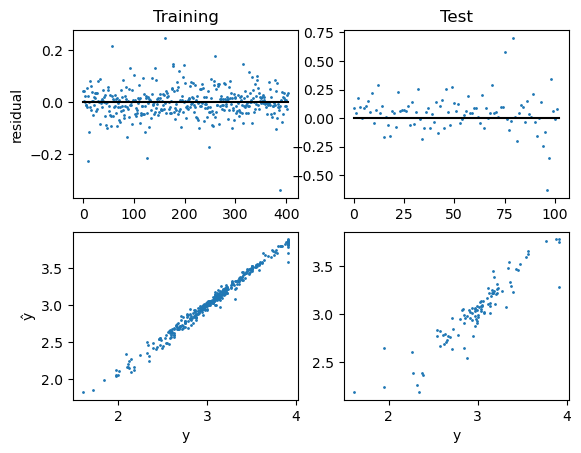

Random Forest Regressor, max_features = log2, n_estimators = 500, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0556
RMSE - test:                         0.1626

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.16 %
Accuracy  test:                      83.15 %
Accuracy   all:                      93.57 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1492 Std: 0.0236 



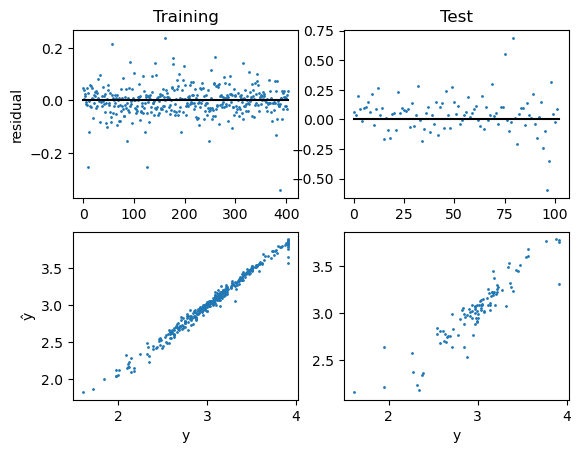

In [98]:
#Now let's look at how max_features impacts the RandomForestRegressor model when using lmv as the label:
mfl = [1,2,3,4,5,6,7,8,9,10,11,12,'auto','sqrt','log2']

for i in mfl:
    print('Random Forest Regressor, max_features = {}, n_estimators = 500, Label = lmv, StandardScaler Scaled Data:'.format(i),'\n')
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    rand_forest_reg = RandomForestRegressor(n_estimators = 500, max_features = i)
    rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(rand_forest_reg, X_train_ss, X_test_ss, X_ss, lmv_train, lmv_test, lmv)
    sum_array = np.vstack((sum_array,[['RandomForestRegressor()','n_estimators = 500, max_features = {}'.format(i),'lmv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [99]:
#Look at what max_features hyperparameter performed best for lmv label
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])
bl = []
for i in range(len(test)):
    a = 'max_features' in test['Parameters'][i]
    bl.append(a)


lmv_df = test[bl]
lmv_df = lmv_df[lmv_df['Label'] == 'lmv']
lmv_df = lmv_df[lmv_df['Predictor'] == 'RandomForestRegressor()']
lmv_df.sort_values(by = ['CV10 All Avg RMSE'])

Predictor                               Parameters Label  \
54  RandomForestRegressor()     n_estimators = 500, max_features = 5   lmv   
55  RandomForestRegressor()     n_estimators = 500, max_features = 6   lmv   
53  RandomForestRegressor()     n_estimators = 500, max_features = 4   lmv   
56  RandomForestRegressor()     n_estimators = 500, max_features = 7   lmv   
64  RandomForestRegressor()  n_estimators = 500, max_features = log2   lmv   
63  RandomForestRegressor()  n_estimators = 500, max_features = sqrt   lmv   
57  RandomForestRegressor()     n_estimators = 500, max_features = 8   lmv   
52  RandomForestRegressor()     n_estimators = 500, max_features = 3   lmv   
58  RandomForestRegressor()     n_estimators = 500, max_features = 9   lmv   
59  RandomForestRegressor()    n_estimators = 500, max_features = 10   lmv   
60  RandomForestRegressor()    n_estimators = 500, max_features = 11   lmv   
61  RandomForestRegressor()    n_estimators = 500, max_features = 12   lmv   
62  RandomForestRegressor()  n_estimators = 500, max_features = auto   lmv   
51  RandomForestRegressor()     n_estimators = 500, max_features = 2   lmv   
50  RandomForestRegressor()     n_estimators = 500, max_features = 1   lmv   

         DataScale            Train RMSE            Test RMSE  \
54  StandardScaler   0.05554181330719868   0.1552591862183357   
55  StandardScaler  0.056986788003447135   0.1549303487718794   
53  StandardScaler   0.05407845261299765   0.1568274876852884   
56  StandardScaler   0.05737946134349082  0.15559061786789102   
64  StandardScaler   0.05563797873204823  0.16260998863864612   
63  StandardScaler   0.05521061674606036  0.16529815764252898   
57  StandardScaler  0.057182997581330226  0.15495003238655458   
52  StandardScaler   0.05518312238583761  0.16180694659416422   
58  StandardScaler   0.05807354277350122  0.15832012117687283   
59  StandardScaler   0.05835068614010692  0.15880270400882965   
60  StandardScaler   0.05919260087675468  0.15986135964538298   
61  StandardScaler   0.06015656034660775  0.15931591738190612   
62  StandardScaler   0.05972327006393296  0.16043796129453547   
51  StandardScaler   0.05640255506210599  0.16739135706230987   
50  StandardScaler  0.059839911307845446  0.18358228649266478   

    CV10 Train Avg RMSE   CV10 Train Std RMSE    CV10 All Avg RMSE  \
54  0.14976863250100175  0.026694609887317915  0.17626560077128214   
55   0.1520892243609851   0.02777272878253955  0.17648824766482968   
53  0.14875704378561327  0.025120458423143033  0.17750652480502946   
56   0.1521912895529695  0.028512679541861354  0.17973897162652008   
64   0.1491578769038116  0.023582041508223107   0.1798474472889598   
63   0.1489786531879701  0.024905565648980915  0.18026371620248835   
57  0.15403542461370104  0.029209683557196584  0.18037951993659687   
52   0.1484583330313402  0.024821491777543867  0.18073365362384514   
58  0.15559073454906377  0.031339449476808987   0.1820788311370915   
59  0.15799830873174864   0.03228285677480798  0.18381350132034552   
60  0.15883707885579673    0.0317135128700393  0.18584086764798205   
61  0.15971364804799898   0.03391365212639925   0.1886880824558625   
62  0.15979858956761803     0.033699560232154   0.1887833451612815   
51  0.15062791084588723   0.02025425422342598  0.19196638803425364   
50   0.1620410122704763  0.018461767898357583  0.21019414679020607   

      CV10 All Std RMSE      Accuracy Train       Accuracy Test  \
54  0.08125176068890848   0.981650659074634  0.8463551827452366   
55  0.08041800871695166  0.9806834875002255  0.8470053299699767   
53  0.08082008644807828  0.9826048221327094   0.843235516904392   
56   0.0818030698494272  0.9804163655011037  0.8456985116798956   
64   0.0827328987615608  0.9815870637522637  0.8314620360103631   
63  0.08210523298049152  0.9818688413386284  0.8258436434621368   
57  0.08258522719064011  0.9805502422459156   0.846966452119922   
52  0.08279493757869913  0.9818868951301488  0.8331225598133585   
58  

In [100]:
#Want to get specific here, will keep estimators at 100 and vary other parameters:
#Figure out optimal GradientBoostRegressor with lmv label:
param_grid = [
    {'n_estimators':[100],
     'max_features': [5,7,4,12,"auto","log2"],
     'max_depth': [None],
     'learning_rate':[0.001,0.01,0.1,1,10]}
]

gbr = GradientBoostingRegressor(random_state = seed)

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 10,
                           scoring = 'neg_mean_squared_error', return_train_score = True, n_jobs = -1,
                           verbose = 2)

grid_search.fit(X_ss , lmv)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.3s finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                          'max_depth': [None],
                          'max_features': [5, 7, 4, 12, 'auto', 'log2'],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [101]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': None,
 'max_features': 5,
 'n_estimators': 100}

GradientBoostingRegressor, n_estimators = 100, max_depth = None, max_features = 4, learning_rate = 0.1, Label = lmv, StandardScaler Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0000
RMSE - test:                         0.1564

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      100.0 %
Accuracy  test:                      84.4 %
Accuracy   all:                      95.13 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1645 Std: 0.0267 



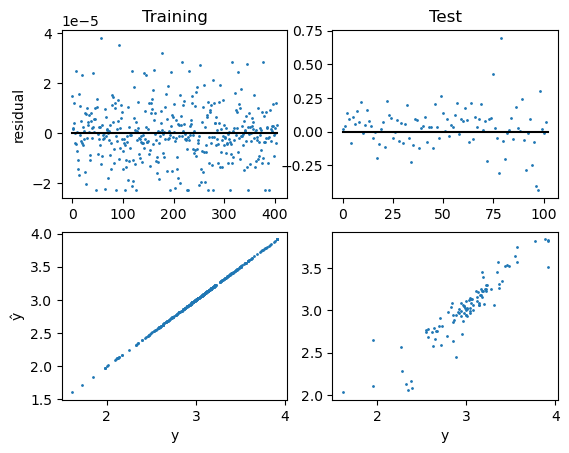

In [102]:
#Look at best GradientBoost Model determined by GridSearchCV
print('GradientBoostingRegressor, n_estimators = 100, max_depth = None, max_features = 4, learning_rate = 0.1, Label = lmv, StandardScaler Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = None, max_features = 5, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(gbr, X_train_ss, X_test_ss, X_ss, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 100, max_depth = None, max_features = 4, learning_rate = 0.1','lmv','StandardScaler',
                      rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                       rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [103]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])
lmv_df = test[test['Label'] == 'lmv']
lmv_df.sort_values(by = ['CV10 All Avg RMSE'])

Predictor  \
54      RandomForestRegressor()   
55      RandomForestRegressor()   
65  GradientBoostingRegressor()   
53      RandomForestRegressor()   
19  GradientBoostingRegressor()   
56      RandomForestRegressor()   
64      RandomForestRegressor()   
63      RandomForestRegressor()   
57      RandomForestRegressor()   
52      RandomForestRegressor()   
58      RandomForestRegressor()   
59      RandomForestRegressor()   
60      RandomForestRegressor()   
61      RandomForestRegressor()   
62      RandomForestRegressor()   
51      RandomForestRegressor()   
7                       Ridge()   
12                      Ridge()   
13                      Lasso()   
8                       Ridge()   
3            LinearRegression()   
2            LinearRegression()   
50      RandomForestRegressor()   

                                           Parameters Label       DataScale  \
54               n_estimators = 500, max_features = 5   lmv  StandardScaler   
55               n_estimators = 500, max_features = 6   lmv  StandardScaler   
65  n_estimators = 100, max_depth = None, max_feat...   lmv  StandardScaler   
53               n_estimators = 500, max_features = 4   lmv  StandardScaler   
19                                 n_estimators = 100   lmv  StandardScaler   
56               n_estimators = 500, max_features = 7   lmv  StandardScaler   
64            n_estimators = 500, max_features = log2   lmv  StandardScaler   
63            n_estimators = 500, max_features = sqrt   lmv  StandardScaler   
57               n_estimators = 500, max_features = 8   lmv  StandardScaler   
52               n_estimators = 500, max_features = 3   lmv  StandardScaler   
58               n_estimators = 500, max_features = 9   lmv  StandardScaler   
59              n_estimators = 500, max_features = 10   lmv  StandardScaler   
60              n_estimators = 500, max_features = 11   lmv  StandardScaler   
61              n_estimators = 500, max_features = 12   lmv  StandardScaler   
62            n_estimators = 500, max_features = auto   lmv  StandardScaler   
51               n_estimators = 500, max_features = 2   lmv  StandardScaler   
7                                           alpha = 1   lmv          MinMax   
12                                         alpha = 10   lmv  StandardScaler   
13                                      alpha = 0.001   lmv  StandardScaler   
8                                           alpha = 1   lmv  StandardScaler   
3                                             Default   lmv  StandardScaler   
2                                             Default   lmv          MinMax   
50               n_estimators = 500, max_features = 1   lmv  StandardScaler   

                Train RMSE            Test RMSE  CV10 Train Avg RMSE  \
54     0.05554181330719868   0.1552591862183357  0.14976863250100175   
55    0.056986788003447135   0.1549303487718794   0.1520892243609851   
65  1.0890824592319252e-05  0.15642431673709067   0.1645275080831446   
53     0.05407845261299765   0.1568274876852884  0.14875704378561327   
19     0.06973661899261423  0.15087331752322167  0.15502835237443674   
56     0.05737946134349082  0.15559061786789102   0.1521912895529695   
64     0.05563797873204823  0.16260998863864612   0.1491578769038116   
63     0.05521061674606036  0.16529815764252898   0.1489786531879701   
57    0.057182997581330226  0.15495003238655458  0.15403542461370104   
52     0.05518312238583761  0.16180694659416422   0.1484583330313402   
58     0.05807354277350122  0.15832012117687283  0.15559073454906377   
59     0.05835068614010692  0.15880270400882965  0.15799830873174864   
60     0.05919260087675468  0.15986135964538298  0.15883707885579673   
61     0.06015656034660775  0.15931591738190612  0.15971364804799898   
62     0.05972327006393296  0.16043796129453547  0.15979858956761803   
51     0.05640255506210599  0.16739135706230987  0.15062791084588723   
7       0.1903023202644577   0.2068581712212958  0.196964221

As a gut check, was able to replicate findings from Assignment #2 as well!

Feature Importance for Top Peforming Model:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


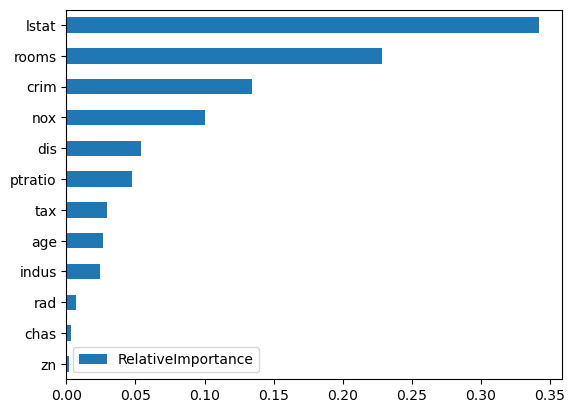

In [104]:
#Top Estimator RandomForestRegressor with n_estimators = 500 and max_features = 5
#Now let's look at the important features outputted from the RandomForestRegressor with max_features = 5 for lmv:
print('Feature Importance for Top Peforming Model:')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rnd_forest_reg = RandomForestRegressor(n_estimators = 500, n_jobs = -1, max_features = 5)
rnd_forest_reg.fit(X_train_ss, lmv_train)
feat_impor = pd.DataFrame(rnd_forest_reg.feature_importances_, 
                          columns = ['RelativeImportance'],
                         index = feature_cols)
feat_impor = feat_impor.sort_values(by = ['RelativeImportance'])
feat_impor.plot.barh()
plt.show()

Feature Importance for 2nd Top Peforming Model:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


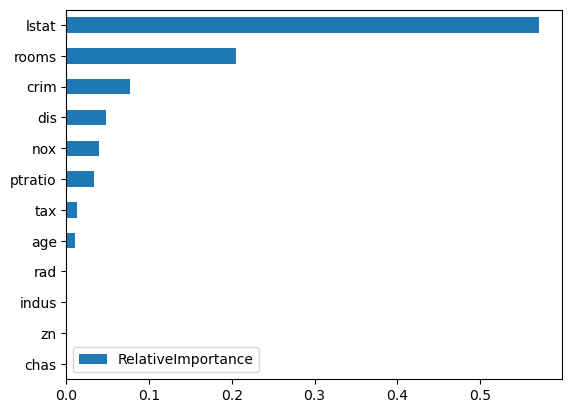

In [105]:
#Top Estimator GradientBoostingRegressor with n_estimators = 100
print('Feature Importance for 2nd Top Peforming Model:')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = None, max_features = 5, random_state = seed)
grb_reg.fit(X_train_ss, lmv_train)
feat_impor = pd.DataFrame(grb_reg.feature_importances_, 
                          columns = ['RelativeImportance'],
                         index = feature_cols)
feat_impor = feat_impor.sort_values(by = ['RelativeImportance'])
feat_impor.plot.barh()
plt.show()

Very interesting here that when the lmv is used as the label, the Random Forest and Gradient Boost regressors both consistently see the top importance features. lstat and rooms are switched when compared to using just the mv. There seems to be better agreement among feature importance with lmv labels compared to mv labels.

Lastly, I just want to look at how these top models will differ if I use MinMax scaling vs. StandardScaling:

Random Forest Regressor, max_features = 5, n_estimators = 500, Label = mv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.2254
RMSE - test:                         4.8708

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.26 %
Accuracy  test:                      67.83 %
Accuracy   all:                      94.92 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.3079 Std: 0.8219 



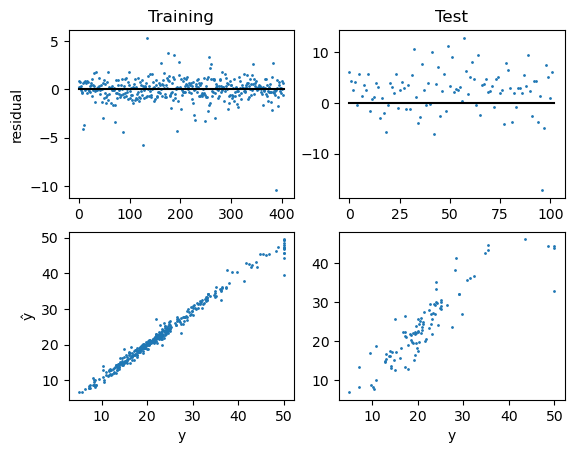

In [106]:
print('Random Forest Regressor, max_features = 5, n_estimators = 500, Label = mv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rand_forest_reg = RandomForestRegressor(n_estimators = 500, max_features = 5)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(rand_forest_reg, X_train_minmax, X_test_minmax, X_minmax, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['RandomForestRegressor()','n_estimators = 500, max_features = 5','mv','MinMax',
                    rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                    rmse_cv_all_std, acc_train, acc_test, acc_all]]))

GradientBoostingRegressor, n_estimators = 100, Label = mv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        1.4033
RMSE - test:                         4.8251

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      97.72 %
Accuracy  test:                      68.43 %
Accuracy   all:                      95.03 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  3.2477 Std: 0.8129 



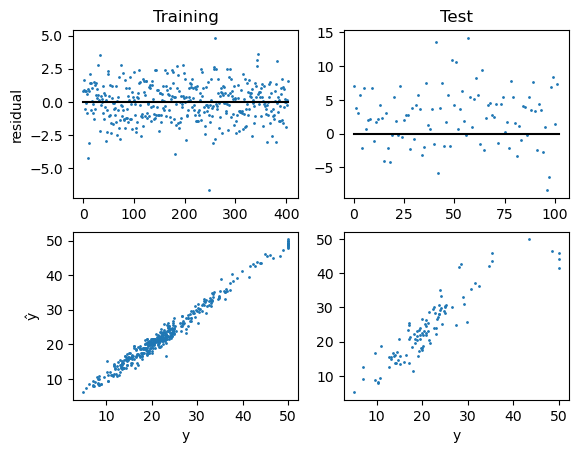

In [107]:
print('GradientBoostingRegressor, n_estimators = 100, Label = mv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr_reg = grb_reg = GradientBoostingRegressor(n_estimators = 100, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(gbr_reg, X_train_minmax, X_test_minmax, X_minmax, mv_train, mv_test, mv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 100','mv','MinMax',
                    rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                    rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [108]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])
mv_df = test[test['Label'] == 'mv']
mv_df.sort_values(by = ['CV10 All Avg RMSE']).head(4)

Predictor                            Parameters Label  \
66      RandomForestRegressor()  n_estimators = 500, max_features = 5    mv   
17  GradientBoostingRegressor()                    n_estimators = 100    mv   
67  GradientBoostingRegressor()                    n_estimators = 100    mv   
32      RandomForestRegressor()  n_estimators = 500, max_features = 5    mv   

         DataScale          Train RMSE          Test RMSE CV10 Train Avg RMSE  \
66          MinMax  1.2254083365503632  4.870830316341184   3.307929688982484   
17  StandardScaler  1.4032784206885218  2.681687766084888   3.247931007017693   
67          MinMax  1.4032784206885218  4.825073765757541  3.2476877906447625   
32  StandardScaler   1.250371834240274  3.236966204794303  3.2932740752699594   

   CV10 Train Std RMSE   CV10 All Avg RMSE   CV10 All Std RMSE  \
66  0.8219253474902283  3.8648676002566864  1.7915376106271559   
17  0.8127458986647994   3.874085072468931   1.588041268319675   
67  0.8129217501191393  3.8759901875861353  1.5874052356223585   
32  0.8109470087909791  3.8848650048464513  1.8175355086986809   

        Accuracy Train       Accuracy Test        Accuracy All  
66  0.9826205664901952  0.6782802119985887  0.9491536877816541  
17  0.9772090909099299   0.902481234596625  0.9455163436170196  
67  0.9772090909099299  0.6842962886451727  0.9502620975211308  
32  0.9819052611444833  0.8579150419488129  0.9463025304481224

Here we can see that the StandardScaled data just slightly outperforms the MinMax scaled data. This was consistent with the findings from Assignment #2 as well. I will verify again with lmv labels:

Random Forest Regressor, max_features = 5, n_estimators = 500, Label = lmv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0559
RMSE - test:                         0.1968

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      98.14 %
Accuracy  test:                      75.32 %
Accuracy   all:                      94.71 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1499 Std: 0.0268 



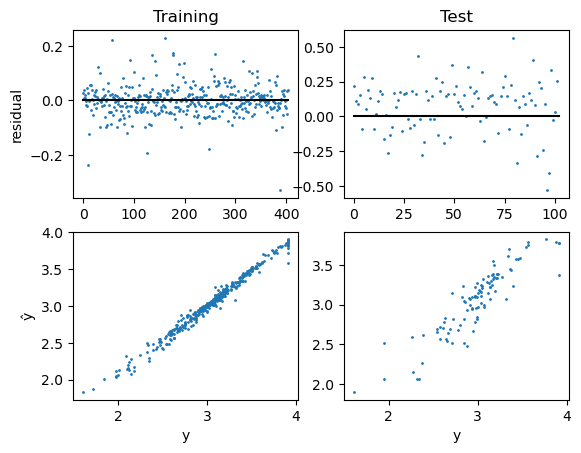

In [109]:
print('Random Forest Regressor, max_features = 5, n_estimators = 500, Label = lmv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
rand_forest_reg = RandomForestRegressor(n_estimators = 500, max_features = 5)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(rand_forest_reg, X_train_minmax, X_test_minmax, X_minmax, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['RandomForestRegressor()','n_estimators = 500, max_features = 5','lmv','MinMax',
                    rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                    rmse_cv_all_std, acc_train, acc_test, acc_all]]))

GradientBoostingRegressor, Top Model, Label = lmv, MinMax Scaled Data: 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RMSE Summary:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - train:                        0.0000
RMSE - test:                         0.2039

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy train:                      100.0 %
Accuracy  test:                      73.49 %
Accuracy   all:                      95.64 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train: Mean RMSE:  0.1645 Std: 0.0267 



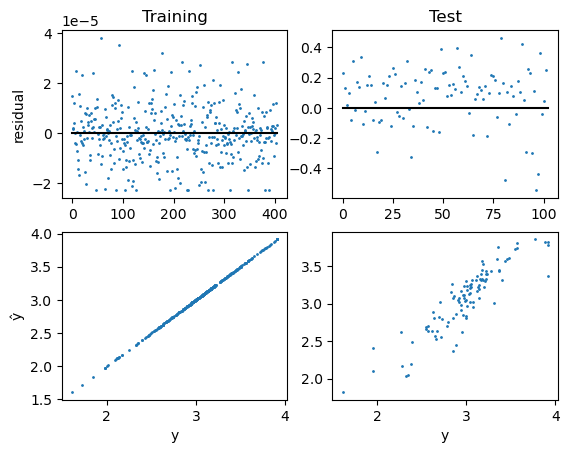

In [110]:
print('GradientBoostingRegressor, Top Model, Label = lmv, MinMax Scaled Data:','\n')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
gbr_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = None, max_features = 5, random_state = seed)
rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, rmse_cv_all_std, acc_train, acc_test, acc_all = ml_model_eval(gbr_reg, X_train_minmax, X_test_minmax, X_minmax, lmv_train, lmv_test, lmv)
sum_array = np.vstack((sum_array,[['GradientBoostingRegressor()','n_estimators = 100, learning_rate = 0.1, max_depth = None, max_features = 5','lmv','MinMax',
                    rmse_train, rmse_test, rmse_cv_train, rmse_cv_train_std, rmse_cv_all, 
                    rmse_cv_all_std, acc_train, acc_test, acc_all]]))

In [111]:
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])
lmv_df = test[test['Label'] == 'lmv']
lmv_df.sort_values(by = ['CV10 All Avg RMSE']).head()

Predictor  \
54      RandomForestRegressor()   
55      RandomForestRegressor()   
68      RandomForestRegressor()   
65  GradientBoostingRegressor()   
69  GradientBoostingRegressor()   

                                           Parameters Label       DataScale  \
54               n_estimators = 500, max_features = 5   lmv  StandardScaler   
55               n_estimators = 500, max_features = 6   lmv  StandardScaler   
68               n_estimators = 500, max_features = 5   lmv          MinMax   
65  n_estimators = 100, max_depth = None, max_feat...   lmv  StandardScaler   
69  n_estimators = 100, learning_rate = 0.1, max_d...   lmv          MinMax   

                Train RMSE            Test RMSE  CV10 Train Avg RMSE  \
54     0.05554181330719868   0.1552591862183357  0.14976863250100175   
55    0.056986788003447135   0.1549303487718794   0.1520892243609851   
68     0.05585549904635191  0.19679519643386076  0.14985532704305649   
65  1.0890824592319252e-05  0.15642431673709067   0.1645275080831446   
69  1.0890824592319252e-05  0.20393018777740604  0.16453805796625043   

     CV10 Train Std RMSE    CV10 All Avg RMSE    CV10 All Std RMSE  \
54  0.026694609887317915  0.17626560077128214  0.08125176068890848   
55   0.02777272878253955  0.17648824766482968  0.08041800871695166   
68   0.02683674004118395  0.17663159986857435  0.08147739032489815   
65  0.026654686058925486  0.17700014515445123  0.07713528904731286   
69   0.02665233041273812  0.17710663370985247  0.07728701942094902   

        Accuracy Train       Accuracy Test        Accuracy All  
54   0.981650659074634  0.8463551827452366  0.9388705335983711  
55  0.9806834875002255  0.8470053299699767  0.9377902129692643  
68  0.9814428091606046  0.7531504775900564  0.9470856199383015  
65  0.9999999992944921  0.8440404988048158   0.951264370029871  
69  0.9999999992944921  0.7349264817024753  0.9563656651047139

Sort of a mixed bag with regards to the performace of MinMax vs. StandardScaler with the lmv labels. MinMax performed better with the best model to produce the top model overall. But the top GBR model occured with the StandardScaled data instead of the MinMax scaled data.

In [112]:
trees_lab = []
for i in range(len(test)):
    a = 'DecisionTreeRegressor' in test['Predictor'][i]
    b = 'RandomForestRegressor' in test['Predictor'][i]
    if a or b is True:
        c = True
    else:
        c = False
    trees_lab.append(c)


trees_df = test[trees_lab]
trees_df = trees_df[trees_df['Label'] == 'mv']
trees_df.sort_values(by = ['CV10 All Avg RMSE']).head(3)

Predictor                            Parameters Label  \
66  RandomForestRegressor()  n_estimators = 500, max_features = 5    mv   
32  RandomForestRegressor()  n_estimators = 500, max_features = 5    mv   
33  RandomForestRegressor()  n_estimators = 500, max_features = 6    mv   

         DataScale          Train RMSE          Test RMSE CV10 Train Avg RMSE  \
66          MinMax  1.2254083365503632  4.870830316341184   3.307929688982484   
32  StandardScaler   1.250371834240274  3.236966204794303  3.2932740752699594   
33  StandardScaler   1.248661236391732  3.166550210882381    3.29665329786475   

   CV10 Train Std RMSE   CV10 All Avg RMSE   CV10 All Std RMSE  \
66  0.8219253474902283  3.8648676002566864  1.7915376106271559   
32  0.8109470087909791  3.8848650048464513  1.8175355086986809   
33  0.8292083847139683  3.8984030625642214   1.858815477572019   

        Accuracy Train       Accuracy Test        Accuracy All  
66  0.9826205664901952  0.6782802119985887  0.9491536877816541  
32  0.9819052611444833  0.8579150419488129  0.9463025304481224  
33  0.9819547370646464  0.8640295513041893  0.9470598751742142

In [113]:
test[test['Label'] == 'lmv'].sort_values(by = ['CV10 All Avg RMSE']).tail(10)

Predictor                               Parameters Label  \
61  RandomForestRegressor()    n_estimators = 500, max_features = 12   lmv   
62  RandomForestRegressor()  n_estimators = 500, max_features = auto   lmv   
51  RandomForestRegressor()     n_estimators = 500, max_features = 2   lmv   
7                   Ridge()                                alpha = 1   lmv   
12                  Ridge()                               alpha = 10   lmv   
13                  Lasso()                            alpha = 0.001   lmv   
8                   Ridge()                                alpha = 1   lmv   
3        LinearRegression()                                  Default   lmv   
2        LinearRegression()                                  Default   lmv   
50  RandomForestRegressor()     n_estimators = 500, max_features = 1   lmv   

         DataScale            Train RMSE            Test RMSE  \
61  StandardScaler   0.06015656034660775  0.15931591738190612   
62  StandardScaler   0.05972327006393296  0.16043796129453547   
51  StandardScaler   0.05640255506210599  0.16739135706230987   
7           MinMax    0.1903023202644577   0.2068581712212958   
12  StandardScaler   0.18841197109942517  0.20328715236600808   
13  StandardScaler    0.1880883672993099  0.20227223262201588   
8   StandardScaler   0.18791370579952094  0.20142075690572597   
3   StandardScaler     0.187906126111099   0.2011832822794696   
2           MinMax     0.187906126111099  0.21467553967094324   
50  StandardScaler  0.059839911307845446  0.18358228649266478   

    CV10 Train Avg RMSE   CV10 Train Std RMSE    CV10 All Avg RMSE  \
61  0.15971364804799898   0.03391365212639925   0.1886880824558625   
62  0.15979858956761803     0.033699560232154   0.1887833451612815   
51  0.15062791084588723   0.02025425422342598  0.19196638803425364   
7   0.19696422150004855  0.015242711380913529   0.1992235090915125   
12  0.19615870591833698  0.017790600504055884   0.2001545617684723   
13  0.19620083885871048  0.018019282095699148  0.20199747658846107   
8    0.1962216604619487  0.018154805538804015  0.20217869623595636   
3   0.19630049162804492  0.018182613258249283   0.2024885290419312   
2   0.19630049162804503  0.018182613258249304   0.2024885290419313   
50   0.1620410122704763  0.018461767898357583  0.21019414679020607   

      CV10 All Std RMSE      Accuracy Train       Accuracy Test  \
61  0.08464169884321344  0.9784748417375239  0.8382211881252598   
62  0.08356468483265969  0.9787838039954821  0.8359343839346436   
51  0.08649141197588077   0.981077525985461  0.8214049717704759   
7   0.09616174084366455  0.7845886769828849  0.7272601068793568   
12  0.09683816840013779  0.7888469557123428  0.7365955129088118   
13   0.0955837469504226   0.789571657520644  0.7392190636083082   
8   0.09458781930813391  0.7899622894922871  0.7414099849124404   
3   0.09426006514874902  0.7899792333153878    0.74201937957312   
2   0.09426006514874909  0.7899792333153878  0.7062563879646258   
50  0.08199396954396294  0.9787008514024977  0.7851848764979642   

          Accuracy All  
61  0.9299774521015478  
62  0.9297646846151294  
51  0.9336573461438396  
7   0.7796323512375599  
12  0.7841697907934914  
13  0.7853523304535571  
8   0.7862145979450333  
3   0.7863746763692165  
2   0.7865064081438701  
50  0.9199570104805321

In [118]:
#Look at what max_features hyperparameter performed best for lmv label
test = pd.DataFrame(data = sum_array, columns = ['Predictor','Parameters','Label','DataScale','Train RMSE', 'Test RMSE', 
                                    'CV10 Train Avg RMSE',
                                      'CV10 Train Std RMSE', 'CV10 All Avg RMSE','CV10 All Std RMSE',
                                      'Accuracy Train','Accuracy Test','Accuracy All'])
bl = []
for i in range(len(test)):
    a = 'max_features' in test['Parameters'][i]
    bl.append(a)


lmv_df = test[bl]
lmv_df = lmv_df[lmv_df['Label'] == 'lmv']
lmv_df = lmv_df[lmv_df['DataScale'] != 'MinMax']
lmv_df = lmv_df[lmv_df['Predictor'] == 'RandomForestRegressor()']
lmv_df = lmv_df[['Predictor','Parameters','Label','DataScale','CV10 All Avg RMSE','CV10 All Std RMSE']]
lmv_df.sort_values(by = ['CV10 All Avg RMSE'])

Predictor                               Parameters Label  \
54  RandomForestRegressor()     n_estimators = 500, max_features = 5   lmv   
55  RandomForestRegressor()     n_estimators = 500, max_features = 6   lmv   
53  RandomForestRegressor()     n_estimators = 500, max_features = 4   lmv   
56  RandomForestRegressor()     n_estimators = 500, max_features = 7   lmv   
64  RandomForestRegressor()  n_estimators = 500, max_features = log2   lmv   
63  RandomForestRegressor()  n_estimators = 500, max_features = sqrt   lmv   
57  RandomForestRegressor()     n_estimators = 500, max_features = 8   lmv   
52  RandomForestRegressor()     n_estimators = 500, max_features = 3   lmv   
58  RandomForestRegressor()     n_estimators = 500, max_features = 9   lmv   
59  RandomForestRegressor()    n_estimators = 500, max_features = 10   lmv   
60  RandomForestRegressor()    n_estimators = 500, max_features = 11   lmv   
61  RandomForestRegressor()    n_estimators = 500, max_features = 12   lmv   
62  RandomForestRegressor()  n_estimators = 500, max_features = auto   lmv   
51  RandomForestRegressor()     n_estimators = 500, max_features = 2   lmv   
50  RandomForestRegressor()     n_estimators = 500, max_features = 1   lmv   

         DataScale    CV10 All Avg RMSE    CV10 All Std RMSE  
54  StandardScaler  0.17626560077128214  0.08125176068890848  
55  StandardScaler  0.17648824766482968  0.08041800871695166  
53  StandardScaler  0.17750652480502946  0.08082008644807828  
56  StandardScaler  0.17973897162652008   0.0818030698494272  
64  StandardScaler   0.1798474472889598   0.0827328987615608  
63  StandardScaler  0.18026371620248835  0.08210523298049152  
57  StandardScaler  0.18037951993659687  0.08258522719064011  
52  StandardScaler  0.18073365362384514  0.08279493757869913  
58  StandardScaler   0.1820788311370915  0.08133957277213198  
59  StandardScaler  0.18381350132034552  0.08187117375798074  
60  StandardScaler  0.18584086764798205  0.08313260406914544  
61  StandardScaler   0.1886880824558625  0.08464169884321344  
62  StandardScaler   0.1887833451612815  0.08356468483265969  
51  StandardScaler  0.19196638803425364  0.08649141197588077  
50  StandardScaler  0.21019414679020607  0.08199396954396294